<a href="https://colab.research.google.com/github/kraseliukts/TFM-MBID/blob/main/TFM_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FIN DE MASTER MBID.**
# **"Análisis del Comportamiento de Usuarios de Bicicletas Públicas".**
# **Estudiante: Tatiana Kraseliuk.**
# **Tutor: Raul Reyero Diez.**

# Obtencion de los datos para el analisis, limpieza, preprocesado y generacion del dataset a trabajar.

Realizamos la lectura de los datos originales, revisamos la estructura y unimos todos en uno solo, para posterior analisis y tratamiento.

In [60]:
pip install skforecast

Importamos todas las librerias necesarias para el desarrollo del proyecto.

In [2]:
import csv
import pandas as pd
import os
import numpy as np
import seaborn as sns
from datetime import *
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime as dt
import sklearn
import pydot
import warnings

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from skforecast.datasets import fetch_dataset

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import KFold

from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
import optuna

from statsmodels.stats.outliers_influence import variance_inflation_factor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect

from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

from bs4 import BeautifulSoup
from urllib.request import urlopen

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import export_graphviz

optuna.logging.set_verbosity(optuna.logging.WARNING)
from pprint import pprint

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8

Se han descargado los datos de viajes de la pagina oficial de Capital Bike Share, se cargaron a GoogleDrive y se procedio con la lectura de un archivo con la informacion de viajes en la bicicleta, para revisar su estructura.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_CBS/202004-capitalbikeshare-tripdata.csv')
df.head()
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [ ]:
df.head()

ride_id rideable_type           started_at             ended_at  \
0  77A0F1B26D1597B1   docked_bike  2020-04-25 17:28:39  2020-04-25 17:35:04   
1  8698F10128EA4F18   docked_bike  2020-04-06 07:54:59  2020-04-06 07:57:24   
2  AA07819DC0F58872   docked_bike  2020-04-22 17:06:18  2020-04-22 18:08:32   
3  DA909BCA92EF85AB   docked_bike  2020-04-16 15:22:40  2020-04-16 15:58:37   
4  B36F1E14D8C6757E   docked_bike  2020-04-10 13:19:41  2020-04-10 13:23:05   

                  start_station_name  start_station_id  \
0  Rhode Island & Connecticut Ave NW             31239   
1                     21st & I St NW             31205   
2     Connecticut Ave & Tilden St NW             31313   
3                      7th & E St SW             31294   
4      Potomac & Pennsylvania Ave SE             31606   

                 end_station_name  end_station_id  start_lat  start_lng  \
0                  12th & L St NW         31251.0  38.905996 -77.039802   
1                  18th & L St NW         31224.0  38.900711 -77.046449   
2  Connecticut Ave & Tilden St NW         31313.0  38.941139 -77.061977   
3                   7th & E St SW         31294.0  38.883450 -77.021741   
4  8th & Eye St SE / Barracks Row         31608.0  38.880300 -76.986200   

     end_lat    end_lng member_casual  
0  38.903819 -77.028400        casual  
1  38.903741 -77.042452        member  
2  38.941139 -77.061977        casual  
3  38.883450 -77.021741        casual  
4  38.879200 -76.995300        member

Leamos todos los archivos, en el periodo del 042020 al 012024, y posteriormente visualicemos los archivos en la ruta especificada.

In [ ]:
path = '/content/drive/MyDrive/Data_CBS'
files=[os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]

In [ ]:
files

['/content/drive/MyDrive/Data_CBS/202012-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202005-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202006-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202007-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202008-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202009-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202010-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202011-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202101-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202102-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202103-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202104-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202105-capitalbikeshare-tripdata.csv',
 '/content/drive/MyDrive/Data_CBS/202106-capitalbik

Procedemos con la unificacion de todos los archivos en uno solo.

In [ ]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.shape

<ipython-input-132-c32b831aa4ad>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, files), ignore_index=True)


(12612345, 13)

In [ ]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [ ]:
df.to_csv('completo_crudo.csv')

In [ ]:
df=pd.read_csv('completo_crudo.csv')

<ipython-input-3-a0354fe72839>:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('completo_crudo.csv')


### Datos de viajes en bicicleta. Análisis y limpieza de los datos de CBS. Capital Bike Share system. Periodo: 032020 - 012024.

Vamos a separar la fecha y hora, para los registros de "started_at" y "ended_at", vamos a convertirlos en formato de fecha y separar el año, mes, día y hora. Posteriormente se borraran dichas variables originales.


In [ ]:
df['Date_started'] = pd.to_datetime(df['started_at']).dt.date
df['Time_started'] = pd.to_datetime(df['started_at']).dt.time

In [ ]:
df['Date_ended'] = pd.to_datetime(df['ended_at']).dt.date
df['Time_ended'] = pd.to_datetime(df['ended_at']).dt.time

In [ ]:
df['Date_started'] = pd.to_datetime(df['Date_started'], format='%Y-%m-%d')
df['Date_ended'] = pd.to_datetime(df['Date_ended'], format='%Y-%m-%d')

da = pd.to_datetime(df['Time_started'], format='%H:%M:%S')
de = pd.to_datetime(df['Time_ended'], format='%H:%M:%S')

df['Year_started'] = df['Date_started'].dt.year
df['Month_started'] = df['Date_started'].dt.month
df['Day_started'] = df['Date_started'].dt.day
df['Hour_started'] = da.dt.hour

df['Year_ended'] = df['Date_ended'].dt.year
df['Month_ended'] = df['Date_ended'].dt.month
df['Day_ended'] = df['Date_ended'].dt.day
df['Hour_ended'] = de.dt.hour

Revisaremos los valores de las columnas "member_casual" y "rideable_type", para ver la necesidad de realizar cambios y/o unificar valores. No se necesita realizar ningun cambio.

In [ ]:
df["member_casual"].value_counts()

member    7558093
casual    5054252
Name: member_casual, dtype: int64

In [ ]:
df["rideable_type"].value_counts()

classic_bike     7875697
electric_bike    2805392
docked_bike      1931256
Name: rideable_type, dtype: int64

Revisaremos la existencia de los valores duplicados. No existen valores duplicados.

In [ ]:
df_dup = df.drop_duplicates()

In [ ]:
print(df_dup.shape)
print(df.shape)

(12612345, 25)
(12612345, 25)


Revisaremos los valores faltantes

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
ride_id - 0%
rideable_type - 0%
started_at - 0%
ended_at - 0%
start_station_name - 7%
start_station_id - 7%
end_station_name - 8%
end_station_id - 8%
start_lat - 0%
start_lng - 0%
end_lat - 0%
end_lng - 0%
member_casual - 0%
Date_started - 0%
Time_started - 0%
Date_ended - 0%
Time_ended - 0%
Year_started - 0%
Month_started - 0%
Day_started - 0%
Hour_started - 0%
Year_ended - 0%
Month_ended - 0%
Day_ended - 0%
Hour_ended - 0%


Las columnas "start_station_name", "start_station_id", "end_station_name" y "end_station_id" contienen 7% y 8% de los datos faltantes. En vista de que los mismos no aportan la informacion importante para el analisis, se procederá a borrarlas. De igual manera, se borraran las columnas "started_at" y "ended_at" para evitar tener la informacion redundante (de esas columnas ya hemos extraido la informacion).

In [ ]:
#borramos las columnas "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name" y "end_station_id"
cols_to_drop= ['started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']
df= df.drop(cols_to_drop, axis=1)
df.dtypes

Unnamed: 0                int64
ride_id                  object
rideable_type            object
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
member_casual            object
Date_started     datetime64[ns]
Time_started             object
Date_ended       datetime64[ns]
Time_ended               object
Year_started              int64
Month_started             int64
Day_started               int64
Hour_started              int64
Year_ended                int64
Month_ended               int64
Day_ended                 int64
Hour_ended                int64
dtype: object

In [ ]:
df

Unnamed: 0           ride_id rideable_type  start_lat  start_lng  \
0                  0  C04E20007D039277   docked_bike  38.918809 -77.041571   
1                  1  A488C0D9F4761D06  classic_bike  38.880300 -76.986200   
2                  2  9E7E97A927A85552  classic_bike  38.880300 -76.986200   
3                  3  565C5C331ABAD77B  classic_bike  38.847129 -77.112550   
4                  4  7576B3F4B4D6ADFF  classic_bike  38.888282 -77.111066   
...              ...               ...           ...        ...        ...   
12612340    12612340  244DFAA774821458  classic_bike  38.813474 -77.053734   
12612341    12612341  37AA6C3B1F9AC09E  classic_bike  38.911268 -77.041829   
12612342    12612342  EE6C9FCF49D67F93  classic_bike  38.911268 -77.041829   
12612343    12612343  1F2CC785FD9815BB  classic_bike  38.897218 -77.072143   
12612344    12612344  B90938446FA16C8A  classic_bike  38.911268 -77.041829   

            end_lat    end_lng member_casual Date_started Time_started  \
0         38.899680 -77.041539        casual   2020-12-02     09:10:36   
1         38.888097 -77.038325        casual   2020-12-31     12:46:29   
2         38.888097 -77.038325        casual   2020-12-31     12:47:03   
3         38.842600 -77.050200        member   2020-12-29     13:50:51   
4         38.882788 -77.103148        member   2020-12-27     12:30:28   
...             ...        ...           ...          ...          ...   
12612340  38.807040 -77.059817        casual   2024-01-18     14:25:19   
12612341  38.903827 -77.053485        member   2024-01-14     20:32:56   
12612342  38.903584 -77.044789        member   2024-01-26     08:59:17   
12612343  38.893993 -77.078570        member   2024-01-18     12:46:41   
12612344  38.903584 -77.044789        member   2024-01-29     08:35:29   

         Date_ended Time_ended  Year_started  Month_started  Day_started  \
0        2020-12-02   09:24:12          2020             12            2   
1        2020-12-31   14:01:07          2020             12           31   
2        2020-12-31   14:01:04          2020             12           31   
3        2020-12-29   14:12:22          2020             12           29   
4        2020-12-27   12:36:12          2020             12           27   
...             ...        ...           ...            ...          ...   
12612340 2024-01-18   15:17:41          2024              1           18   
12612341 2024-01-14   20:40:29          2024              1           14   
12612342 2024-01-26   09:04:29          2024              1           26   
12612343 2024-01-18   12:51:14          2024              1           18   
12612344 2024-01-29   08:41:20          2024              1           29   

          Hour_started  Year_ended  Month_ended  Day_ended  Hour_ended  
0                    9        2020           12          2           9  
1                   12        2020           12         31          14  
2                   12        2020           12         31          14  
3                   13        2020           12         29          14  
4                   12        2020           12         27          12  
...                ...         ...          ...        ...         ...  
12612340            14        2024            1         18          15  
12612341            20        2024            1         14          20  
12612342             8        2024            1         26           9  
12612343            12        2024            1         18          12  
12612344             8        2024            1         29           8  

[12612345 rows x 20 columns]

In [ ]:
df.to_csv('completo_crudo_2.csv')

In [ ]:
data=pd.read_csv('completo_crudo_2.csv')

Vamos a crear 3 nuevas columnas, "Casual", "Member" y "Member_Casual_count", para distinguir por cada viaje la cantidad de viajes realizados por el usuario registrado (member) o usuarios ocasionales (casual), y se borrará la columna "member_casual".

In [ ]:
data['Casual'] = data['member_casual'].apply(lambda x: +1 if x=='casual' else 0)
data['Member'] = data['member_casual'].apply(lambda x: +1 if x=='member' else 0)
data['Member_Casual_count']=data['Member']+data['Casual']

In [ ]:
data.head()

Unnamed: 0.1  Unnamed: 0           ride_id rideable_type  start_lat  \
0             0           0  C04E20007D039277   docked_bike  38.918809   
1             1           1  A488C0D9F4761D06  classic_bike  38.880300   
2             2           2  9E7E97A927A85552  classic_bike  38.880300   
3             3           3  565C5C331ABAD77B  classic_bike  38.847129   
4             4           4  7576B3F4B4D6ADFF  classic_bike  38.888282   

   start_lng    end_lat    end_lng member_casual Date_started  ...  \
0 -77.041571  38.899680 -77.041539        casual   2020-12-02  ...   
1 -76.986200  38.888097 -77.038325        casual   2020-12-31  ...   
2 -76.986200  38.888097 -77.038325        casual   2020-12-31  ...   
3 -77.112550  38.842600 -77.050200        member   2020-12-29  ...   
4 -77.111066  38.882788 -77.103148        member   2020-12-27  ...   

  Month_started Day_started Hour_started  Year_ended  Month_ended  Day_ended  \
0            12           2            9        2020           12          2   
1            12          31           12        2020           12         31   
2            12          31           12        2020           12         31   
3            12          29           13        2020           12         29   
4            12          27           12        2020           12         27   

   Hour_ended  Casual  Member  Member_Casual_count  
0           9       1       0                    1  
1          14       1       0                    1  
2          14       1       0                    1  
3          14       0       1                    1  
4          12       0       1                    1  

[5 rows x 24 columns]

In [ ]:
# se borran las columnas innecesarias.
cols_to_drop1= ['Unnamed: 0.1', 'Unnamed: 0', 'member_casual']
data= data.drop(cols_to_drop1, axis=1)
data.dtypes

ride_id                 object
rideable_type           object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
Date_started            object
Time_started            object
Date_ended              object
Time_ended              object
Year_started             int64
Month_started            int64
Day_started              int64
Hour_started             int64
Year_ended               int64
Month_ended              int64
Day_ended                int64
Hour_ended               int64
Casual                   int64
Member                   int64
Member_Casual_count      int64
dtype: object

In [ ]:
data.shape

(12612345, 21)

In [ ]:
data.head()

ride_id rideable_type  start_lat  start_lng    end_lat    end_lng  \
0  C04E20007D039277   docked_bike  38.918809 -77.041571  38.899680 -77.041539   
1  A488C0D9F4761D06  classic_bike  38.880300 -76.986200  38.888097 -77.038325   
2  9E7E97A927A85552  classic_bike  38.880300 -76.986200  38.888097 -77.038325   
3  565C5C331ABAD77B  classic_bike  38.847129 -77.112550  38.842600 -77.050200   
4  7576B3F4B4D6ADFF  classic_bike  38.888282 -77.111066  38.882788 -77.103148   

  Date_started Time_started  Date_ended Time_ended  ...  Month_started  \
0   2020-12-02     09:10:36  2020-12-02   09:24:12  ...             12   
1   2020-12-31     12:46:29  2020-12-31   14:01:07  ...             12   
2   2020-12-31     12:47:03  2020-12-31   14:01:04  ...             12   
3   2020-12-29     13:50:51  2020-12-29   14:12:22  ...             12   
4   2020-12-27     12:30:28  2020-12-27   12:36:12  ...             12   

   Day_started  Hour_started  Year_ended  Month_ended  Day_ended  Hour_ended  \
0            2             9        2020           12          2           9   
1           31            12        2020           12         31          14   
2           31            12        2020           12         31          14   
3           29            13        2020           12         29          14   
4           27            12        2020           12         27          12   

   Casual  Member  Member_Casual_count  
0       1       0                    1  
1       1       0                    1  
2       1       0                    1  
3       0       1                    1  
4       0       1                    1  

[5 rows x 21 columns]

In [ ]:
#guardamos el dataset completo
data_completo=data.to_csv('data_cbs_compl_2020-2024.csv')

#### Resumen de los datos de CBS.

#### Dataset #1. Resumen de viajes por día y por categoria de usuario.

Vamos a resumir los datos por fecha "Date_started" y sumar la cantidad de viajes por cada categoria de usuario.

In [ ]:
data_group_date = data.groupby(['Date_started'])

data_resume = data_group_date[['Casual', 'Member','Member_Casual_count']].apply(sum)

In [ ]:
data_resume.head(5)

Casual  Member  Member_Casual_count
Date_started                                     
2020-04-01       410    1355                 1765
2020-04-02       520    1565                 2085
2020-04-03       679    1814                 2493
2020-04-04      1195    1965                 3160
2020-04-05      1929    2523                 4452

In [ ]:
data_resume.dtypes

Casual                 int64
Member                 int64
Member_Casual_count    int64
dtype: object

In [ ]:
data_resume.shape

(1401, 3)

In [ ]:
data_resume.to_csv('resumen_por_dia.csv')

In [ ]:
pd.read_csv('resumen_por_dia.csv').head()

Date_started  Casual  Member  Member_Casual_count
0   2020-04-01     410    1355                 1765
1   2020-04-02     520    1565                 2085
2   2020-04-03     679    1814                 2493
3   2020-04-04    1195    1965                 3160
4   2020-04-05    1929    2523                 4452

#### Dataset #2. Resumen de viajes por día y hora y por categoria de usuario.

Vamos a resumir los datos por fecha "Date_started" y "hour_started" y sumar la cantidad de viajes por categoria de usuario.

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/data_cbs_compl_2020-2024.csv')

In [ ]:
data_group_date_hour = data.groupby(['Year_started','Date_started', 'Hour_started'])

data_resume_dh = data_group_date_hour[['Casual', 'Member','Member_Casual_count']].apply(sum)

In [ ]:
data_resume_dh.head()

Casual  Member  Member_Casual_count
Year_started Date_started Hour_started                                     
2020         2020-04-01   0                  0       1                    1
                          1                  0       2                    2
                          2                  1       0                    1
                          3                  0       2                    2
                          4                  2       3                    5

In [ ]:
data_resume_dh.dtypes

Casual                 int64
Member                 int64
Member_Casual_count    int64
dtype: object

In [ ]:
data_resume_dh.shape

(33581, 3)

In [ ]:
data_resume_dh.to_csv('resumen_por_dia_hora.csv')

In [ ]:
data_resume_dh=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/resumen_por_dia_hora.csv')

In [ ]:
data_resume_dh.head()

Year_started Date_started  Hour_started  Casual  Member  \
0          2020   2020-04-01             0       0       1   
1          2020   2020-04-01             1       0       2   
2          2020   2020-04-01             2       1       0   
3          2020   2020-04-01             3       0       2   
4          2020   2020-04-01             4       2       3   

   Member_Casual_count  
0                    1  
1                    2  
2                    1  
3                    2  
4                    5

#### Dataset #3. Resumen de viajes por Año y Mes y por categoria de usuario.

Vamos a resumir los datos por Año y Mes y sumar la cantidad de viajes por categoria de usuario.

In [ ]:
data_group_year_m= data.groupby(['Year_started', 'Month_started'])

data_resume_ym = data_group_year_m[['Casual', 'Member','Member_Casual_count']].apply(sum)

In [ ]:
data_resume_ym.head()

Casual  Member  Member_Casual_count
Year_started Month_started                                     
2020         4               26809   48662                75471
             5               75546   73505               149051
             6              116310   97737               214047
             7              117737  110610               228347
             8              127718  123885               251603

In [ ]:
data_resume_ym.dtypes

Casual                 int64
Member                 int64
Member_Casual_count    int64
dtype: object

In [ ]:
data_resume_ym.shape

(46, 3)

In [ ]:
data_resume_ym.to_csv('resumen_por_anyo_mes.csv')

In [ ]:
pd.read_csv('resumen_por_anyo_mes.csv').head()

Year_started  Month_started  Casual  Member  Member_Casual_count
0          2020              4   26809   48662                75471
1          2020              5   75546   73505               149051
2          2020              6  116310   97737               214047
3          2020              7  117737  110610               228347
4          2020              8  127718  123885               251603

Resultado final: se han generado 3 datasets diferentes, uno con la informacion consolidada de la cantidad de viajes por cada categoria de usuario y por dia, el 2do, con la informacion consolidada de la cantidad de viajes por cada categoria de usuarios, por dia y  hora, el 3ro, con la informacion consolidad de la cantidad de viajes por cada categoria de usuario por año y mes.

## Datos climaticos. Web Scrapping de la pagina web https://freemeteo.ec.

Se realiza la lectura de los datos mensuales en la pagina web y se guarda en un archivo *.csv.

In [ ]:
url = "https://freemeteo.ec/eltiempo/washington/historia/historial-mensual/?gid=4140963&station=19064&month=1&year=2024&language=spanishar&country=us-united-states"

In [ ]:
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

In [ ]:
tabla_temperaturas = soup.find('div', class_='table hourly')

# Extraemos los datos de la tabla
filas = tabla_temperaturas.find_all('tr')

In [ ]:
# Imprimimos los datos de la tabla
for fila in filas:
    celdas = fila.find_all('td')
    for celda in celdas:
        print(celda.text, end='\t')
    print()

In [ ]:
with open('DATA/datos_temperatura_202401.csv', 'w') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)

    # Iteramos sobre las filas y escribimos en el archivo CSV
    escritor_csv.writerow(['Fecha','Temperatura mínima diaria','Temperatura máxima diaria','Velocidad del viento máxima constante','Ráfagas máximas de viento','Precipitaciones totales diarias','Profundidad de nieve','Presión','Icono','Descripción'])
    for fila in filas:
        celdas = fila.find_all('td')
        fila_datos = [celda.text.strip() for celda in celdas]
        escritor_csv.writerow(fila_datos)

print("Datos guardados")

### Preprocesado de los datos climaticos.

Vamos a unir todos los archvios historicos por mes, a un solo archivo *.csv

In [ ]:
#leamos el primer archivo
df = pd.read_csv('DATA/datos_temperatura_202004.csv')
df.head()
print(df.head())

        Fecha Temperatura mínima diaria Temperatura máxima diaria  \
0  01/04/2020                       6°C                      14°C   
1  02/04/2020                       6°C                      17°C   
2  03/04/2020                       9°C                      19°C   
3  04/04/2020                      11°C                      14°C   
4  05/04/2020                      10°C                      13°C   

  Velocidad del viento máxima constante Ráfagas máximas de viento  \
0                               29 Km/h                   37 Km/h   
1                               45 Km/h                   61 Km/h   
2                               45 Km/h                   65 Km/h   
3                               32 Km/h                       NaN   
4                               13 Km/h                       NaN   

  Precipitaciones totales diarias  Profundidad de nieve   Presión  Icono  \
0                             3mm                   NaN  1009,9mb    NaN   
1                 

In [ ]:
os.listdir('DATA')

['datos_temperatura_202105.csv',
 'datos_temperatura_202111.csv',
 'datos_temperatura_202006.csv',
 'datos_temperatura_202204.csv',
 'datos_temperatura_202106.csv',
 'datos_temperatura_202307.csv',
 'datos_temperatura_202211.csv',
 'datos_temperatura_202309.csv',
 'datos_temperatura_202107.csv',
 'datos_temperatura_202109.csv',
 'datos_temperatura_202302.csv',
 'datos_temperatura_202310.csv',
 'datos_temperatura_202301.csv',
 'datos_temperatura_202110.csv',
 'datos_temperatura_202210.csv',
 'datos_temperatura_202212.csv',
 'datos_temperatura_202202.csv',
 'datos_temperatura_202308.csv',
 'datos_temperatura_202305.csv',
 'datos_temperatura_202306.csv',
 'datos_temperatura_202209.csv',
 'datos_temperatura_202011.csv',
 'datos_temperatura_202005.csv',
 'datos_temperatura_202203.csv',
 'datos_temperatura_202112.csv',
 'datos_temperatura_202101.csv',
 'datos_temperatura_202104.csv',
 'datos_temperatura_202102.csv',
 'datos_temperatura_202312.csv',
 'datos_temperatura_202206.csv',
 'datos_te

In [ ]:
path = 'DATA'
files=[os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]

In [ ]:
temp = pd.concat(map(pd.read_csv, files), ignore_index=True)
temp.shape

(1394, 10)

In [ ]:
temp.head()

Fecha Temperatura mínima diaria Temperatura máxima diaria  \
0  01/05/2021                       8°C                      23°C   
1  02/05/2021                       8°C                      28°C   
2  03/05/2021                      19°C                      22°C   
3  04/05/2021                      20°C                      22°C   
4  05/05/2021                      18°C                      19°C   

  Velocidad del viento máxima constante Ráfagas máximas de viento  \
0                               42 Km/h                   68 Km/h   
1                               32 Km/h                   46 Km/h   
2                               16 Km/h                       NaN   
3                               26 Km/h                   37 Km/h   
4                               13 Km/h                       NaN   

  Precipitaciones totales diarias Profundidad de nieve   Presión  Icono  \
0                             0mm                  NaN  1015,3mb    NaN   
1                             0mm                  NaN  1011,5mb    NaN   
2                             0mm                  NaN  1009,4mb    NaN   
3                           1,5mm                  NaN  1005,5mb    NaN   
4                          12,1mm                  NaN  1006,5mb    NaN   

                               Descripción  
0  no se registran informes meteorológicos  
1  no se registran informes meteorológicos  
2  no se registran informes meteorológicos  
3                      Lluvia (o Llovizna)  
4  no se registran informes meteorológicos

Procedemos con el analisis y el preprocesado de los datos obtenidos.

Cambiemos el formato de fecha con la funcion "to_datetime" y realicemos el sortes por fecha.

In [ ]:
temp["Fecha"]=pd.to_datetime(temp["Fecha"], dayfirst=True).dt.date

In [ ]:
temp=temp.sort_values(by="Fecha")

Vamos a borrar los caracteres especiales y metricas.



In [ ]:
temp["Temperatura mínima diaria"]=temp["Temperatura mínima diaria"].replace({'°C':''}, regex=True)
temp["Temperatura máxima diaria"]=temp["Temperatura máxima diaria"].replace({'°C':''}, regex=True)
temp["Velocidad del viento máxima constante"]=temp["Velocidad del viento máxima constante"].replace({' Km/h':''}, regex=True)
temp["Ráfagas máximas de viento"]=temp["Ráfagas máximas de viento"].replace({' Km/h':''}, regex=True)
temp["Precipitaciones totales diarias"]=temp["Precipitaciones totales diarias"].replace({'mm':''}, regex=True)
temp["Profundidad de nieve"]=temp["Profundidad de nieve"].replace({'cm':''}, regex=True)
temp["Presión"]=temp["Presión"].replace({'mb':''}, regex=True)

Revisaremos los valores faltantes.

In [ ]:
for col in temp.columns:
    pct_missing = np.mean(temp[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Fecha - 0%
Temperatura mínima diaria - 0%
Temperatura máxima diaria - 0%
Velocidad del viento máxima constante - 8%
Ráfagas máximas de viento - 66%
Precipitaciones totales diarias - 0%
Profundidad de nieve - 99%
Presión - 2%
Icono - 100%
Descripción - 0%


Las columnas "Ráfagas máximas de viento", "Profundidad de nieve" y "Icono" tiene el 66%, 99% y 100% respectivamente de los datos faltantes, se procedera con la eliminacion de dichas columnas por no aportar en el analisis.

In [ ]:
cols_to_drop=["Ráfagas máximas de viento", "Profundidad de nieve", "Icono"]
temp= temp.drop(cols_to_drop, axis=1)
temp.dtypes

Fecha                                    object
Temperatura mínima diaria                object
Temperatura máxima diaria                object
Velocidad del viento máxima constante    object
Precipitaciones totales diarias          object
Presión                                  object
Descripción                              object
dtype: object

<Axes: >

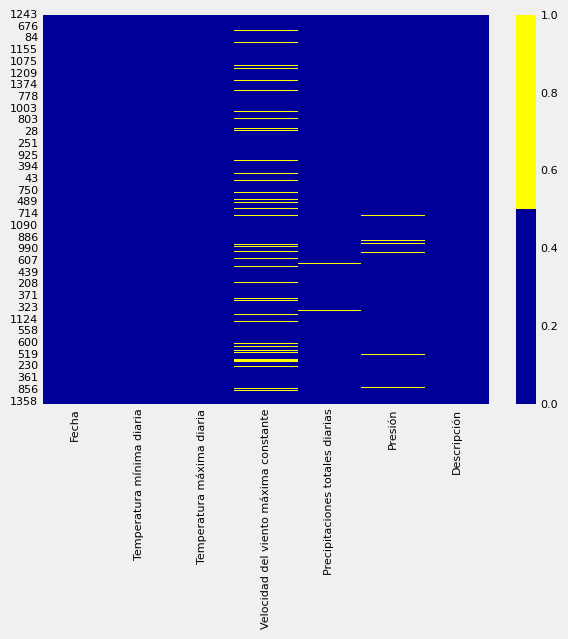

In [ ]:
cols = temp.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing, blue is not missing.
sns.heatmap(temp[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in temp.columns:
    pct_missing = np.mean(temp[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Fecha - 0%
Temperatura mínima diaria - 0%
Temperatura máxima diaria - 0%
Velocidad del viento máxima constante - 8%
Precipitaciones totales diarias - 0%
Presión - 2%
Descripción - 0%


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 1243 to 1365
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Fecha                                  1394 non-null   object
 1   Temperatura mínima diaria              1393 non-null   object
 2   Temperatura máxima diaria              1392 non-null   object
 3   Velocidad del viento máxima constante  1280 non-null   object
 4   Precipitaciones totales diarias        1388 non-null   object
 5   Presión                                1370 non-null   object
 6   Descripción                            1394 non-null   object
dtypes: object(7)
memory usage: 87.1+ KB


Los valores faltantes de las columnas "Presión", "Velocidad del viento máxima constante", 'Temperatura mínima diaria', 'Temperatura máxima diaria' y 'Precipitaciones totales diarias' vamor a estimarlos en base a los valores registrados. Para eso, vamos a convertirlos en float y aplicar la funcion SimpleImputer.

In [ ]:
temp['Velocidad del viento máxima constante']=pd.to_numeric(temp['Velocidad del viento máxima constante'], downcast="float")
temp['Presión']=temp['Presión'].astype("string")
temp['Presión']=temp['Presión'].str.replace(',', '.')
temp['Presión']=pd.to_numeric(temp['Presión'], downcast="float")


In [ ]:
temp['Temperatura mínima diaria']=pd.to_numeric(temp['Temperatura mínima diaria'], downcast="float")
temp['Temperatura máxima diaria']=pd.to_numeric(temp['Temperatura máxima diaria'], downcast="float")
temp['Precipitaciones totales diarias']=temp['Precipitaciones totales diarias'].astype("string")
temp['Precipitaciones totales diarias']=temp['Precipitaciones totales diarias'].str.replace(',', '.')
temp['Precipitaciones totales diarias']=pd.to_numeric(temp['Precipitaciones totales diarias'], downcast="float")

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
temp[["Presión", "Velocidad del viento máxima constante", 'Temperatura mínima diaria', 'Temperatura máxima diaria', 'Precipitaciones totales diarias']] = imp.fit_transform(temp[["Presión", "Velocidad del viento máxima constante",'Temperatura mínima diaria', 'Temperatura máxima diaria', 'Precipitaciones totales diarias']])

Vamos a rellenar los valores faltantes de la columnda "Descripcion" con "no se registran informes meteorológicos" y convertir los valores categoricos en valores numericos.

In [ ]:
temp['Descripción']=temp['Descripción'].fillna('no se registran informes meteorológicos')

In [ ]:
temp.Descripción=temp.Descripción.replace({'no se registran informes meteorológicos':0, 'Lluvia (o Llovizna)':1, 'TormentaLluvia (o Llovizna)':2,
                                                                   'Hielo granuladoLluvia (o Llovizna)':3, 'Hielo granulado':4, 'NieblaLluvia (o Llovizna)':5, 'NieblaHielo granulado':6,
                                                                   'NieblaTormentaLluvia (o Llovizna)':7, 'NieblaHielo granuladoLluvia (o Llovizna)':8    } )

In [ ]:
temp['Fecha'] = pd.to_datetime(temp['Fecha']).dt.date
temp['Fecha'] = pd.to_datetime(temp['Fecha'], format='%Y-%m-%d')

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 1243 to 1365
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Fecha                                  1394 non-null   datetime64[ns]
 1   Temperatura mínima diaria              1394 non-null   float32       
 2   Temperatura máxima diaria              1394 non-null   float32       
 3   Velocidad del viento máxima constante  1394 non-null   float32       
 4   Precipitaciones totales diarias        1394 non-null   float32       
 5   Presión                                1394 non-null   float32       
 6   Descripción                            1394 non-null   int64         
dtypes: datetime64[ns](1), float32(5), int64(1)
memory usage: 59.9 KB


In [ ]:
temp.head()

Fecha  Temperatura mínima diaria  Temperatura máxima diaria  \
1243 2020-04-01                        6.0                       14.0   
1244 2020-04-02                        6.0                       17.0   
1245 2020-04-03                        9.0                       19.0   
1246 2020-04-04                       11.0                       14.0   
1247 2020-04-05                       10.0                       13.0   

      Velocidad del viento máxima constante  Precipitaciones totales diarias  \
1243                                   29.0                              3.0   
1244                                   45.0                              0.0   
1245                                   45.0                              0.0   
1246                                   32.0                              0.0   
1247                                   13.0                              0.0   

          Presión  Descripción  
1243  1009.900024            1  
1244  1011.700012            0  
1245  1009.599976            0  
1246  1013.200012            0  
1247  1018.299988            0

In [ ]:
temp.dtypes

Fecha                                    datetime64[ns]
Temperatura mínima diaria                       float32
Temperatura máxima diaria                       float32
Velocidad del viento máxima constante           float32
Precipitaciones totales diarias                 float32
Presión                                         float32
Descripción                                       int64
dtype: object

In [ ]:
temp.shape

(1394, 7)

Guardemos el archivo final en un archivo *.csv

In [ ]:
temp.to_csv('datos_temperatura_WDC.csv')

Leamos el archvio final.

In [ ]:
pd.read_csv('datos_temperatura_WDC.csv')

Unnamed: 0       Fecha  Temperatura mínima diaria  \
0           1243  2020-04-01                        6.0   
1           1244  2020-04-02                        6.0   
2           1245  2020-04-03                        9.0   
3           1246  2020-04-04                       11.0   
4           1247  2020-04-05                       10.0   
...          ...         ...                        ...   
1389        1361  2024-01-27                       12.0   
1390        1362  2024-01-28                        6.0   
1391        1363  2024-01-29                        6.0   
1392        1364  2024-01-30                        5.0   
1393        1365  2024-01-31                        4.0   

      Temperatura máxima diaria  Velocidad del viento máxima constante  \
0                          14.0                              29.000000   
1                          17.0                              45.000000   
2                          19.0                              45.000000   
3                          14.0                              32.000000   
4                          13.0                              13.000000   
...                         ...                                    ...   
1389                       18.0                              13.000000   
1390                       11.0                              24.000000   
1391                        7.0                              29.000000   
1392                        6.0                              20.780468   
1393                        4.0                              15.000000   

      Precipitaciones totales diarias  Presión  Descripción  
0                                 3.0   1009.9            1  
1                                 0.0   1011.7            0  
2                                 0.0   1009.6            0  
3                                 0.0   1013.2            0  
4                                 0.0   1018.3            0  
...                               ...      ...          ...  
1389                              1.2   1018.3            0  
1390                              5.3   1018.0            1  
1391                             32.0   1006.9            1  
1392                              0.0   1020.2            0  
1393                              0.0   1019.5            0  

[1394 rows x 8 columns]

## Datos Calendario.

Carguemos el archivo con la informacion de calendario y realizaremos el cambio en el formato de fecha.

In [ ]:
calendario=pd.read_csv("Calendario.csv", sep=';')
calendario.head()

Fecha  Anyo  Temporada Dia de semana  Dia_laboral  Feriado_WDC
0  01/04/2020  2020  Primavera     miércoles            1            0
1  02/04/2020  2020  Primavera        jueves            1            0
2  03/04/2020  2020  Primavera       viernes            1            0
3  04/04/2020  2020  Primavera        sábado            0            0
4  05/04/2020  2020  Primavera       domingo            0            0

In [ ]:
calendario["Fecha"]=pd.to_datetime(calendario["Fecha"], dayfirst=True).dt.date
calendario=calendario.sort_values(by="Fecha")
calendario

Fecha  Anyo  Temporada Dia de semana  Dia_laboral  Feriado_WDC
0     2020-04-01  2020  Primavera     miércoles            1            0
1     2020-04-02  2020  Primavera        jueves            1            0
2     2020-04-03  2020  Primavera       viernes            1            0
3     2020-04-04  2020  Primavera        sábado            0            0
4     2020-04-05  2020  Primavera       domingo            0            0
...          ...   ...        ...           ...          ...          ...
1396  2024-01-27  2024   Invierno        sábado            0            0
1397  2024-01-28  2024   Invierno       domingo            0            0
1398  2024-01-29  2024   Invierno         lunes            1            0
1399  2024-01-30  2024   Invierno        martes            1            0
1400  2024-01-31  2024   Invierno     miércoles            1            0

[1401 rows x 6 columns]

In [ ]:
#Vamos a borrar la columna "Anyo".
calendario=calendario.drop(["Anyo"], axis=1)

In [ ]:
calendario['Fecha'] = pd.to_datetime(calendario['Fecha']).dt.date
calendario['Fecha'] = pd.to_datetime(calendario['Fecha'], format='%Y-%m-%d')

In [ ]:
#Vamos a crear las columnas Year, Month y Day
calendario['Year'] = calendario['Fecha'].dt.year
calendario['Month'] = calendario['Fecha'].dt.month
calendario['Day'] = calendario['Fecha'].dt.day

In [ ]:
#Vamos a cambiar el nombre para la columna 'Dia de semana'
calendario.rename(columns={'Dia de semana':'Dia_semana'}, inplace=True)

In [ ]:
#Vamos a cambiar los valores categoricos de las columnas 'Temporada' y 'Dia_semana" a valores numéricos
calendario.Temporada=calendario.Temporada.replace({'Primavera':2, 'Invierno':1, 'Verano':3, 'Otoño':4})
calendario.Dia_semana=calendario.Dia_semana.replace({'lunes':1, 'martes':2, 'miércoles':3, 'jueves':4, 'viernes':5, 'sábado':6, 'domingo':7})

In [ ]:
calendario.head()

Fecha  Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  \
0 2020-04-01          2           3            1            0  2020      4   
1 2020-04-02          2           4            1            0  2020      4   
2 2020-04-03          2           5            1            0  2020      4   
3 2020-04-04          2           6            0            0  2020      4   
4 2020-04-05          2           7            0            0  2020      4   

   Day  
0    1  
1    2  
2    3  
3    4  
4    5

In [ ]:
calendario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        1401 non-null   datetime64[ns]
 1   Temporada    1401 non-null   int64         
 2   Dia_semana   1401 non-null   int64         
 3   Dia_laboral  1401 non-null   int64         
 4   Feriado_WDC  1401 non-null   int64         
 5   Year         1401 non-null   int64         
 6   Month        1401 non-null   int64         
 7   Day          1401 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 130.8 KB


In [ ]:
calendario.shape

(1401, 8)

In [ ]:
calendario.to_csv('Calendario_new.csv')

## Archivo completo de datos climaticos y calendario.

Procedemos con la union de los dos archivos.

In [ ]:
temp.head()

Fecha  Temperatura mínima diaria  Temperatura máxima diaria  \
1243 2020-04-01                        6.0                       14.0   
1244 2020-04-02                        6.0                       17.0   
1245 2020-04-03                        9.0                       19.0   
1246 2020-04-04                       11.0                       14.0   
1247 2020-04-05                       10.0                       13.0   

      Velocidad del viento máxima constante  Precipitaciones totales diarias  \
1243                                   29.0                              3.0   
1244                                   45.0                              0.0   
1245                                   45.0                              0.0   
1246                                   32.0                              0.0   
1247                                   13.0                              0.0   

          Presión  Descripción  
1243  1009.900024            1  
1244  1011.700012            0  
1245  1009.599976            0  
1246  1013.200012            0  
1247  1018.299988            0

In [ ]:
calendario.head()

Fecha  Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  \
0 2020-04-01          2           3            1            0  2020      4   
1 2020-04-02          2           4            1            0  2020      4   
2 2020-04-03          2           5            1            0  2020      4   
3 2020-04-04          2           6            0            0  2020      4   
4 2020-04-05          2           7            0            0  2020      4   

   Day  
0    1  
1    2  
2    3  
3    4  
4    5

In [ ]:
union=pd.merge(left=calendario,right=temp, how='left', left_on='Fecha', right_on='Fecha')
union.head()

Fecha  Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  \
0 2020-04-01          2           3            1            0  2020      4   
1 2020-04-02          2           4            1            0  2020      4   
2 2020-04-03          2           5            1            0  2020      4   
3 2020-04-04          2           6            0            0  2020      4   
4 2020-04-05          2           7            0            0  2020      4   

   Day  Temperatura mínima diaria  Temperatura máxima diaria  \
0    1                        6.0                       14.0   
1    2                        6.0                       17.0   
2    3                        9.0                       19.0   
3    4                       11.0                       14.0   
4    5                       10.0                       13.0   

   Velocidad del viento máxima constante  Precipitaciones totales diarias  \
0                                   29.0                              3.0   
1                                   45.0                              0.0   
2                                   45.0                              0.0   
3                                   32.0                              0.0   
4                                   13.0                              0.0   

       Presión  Descripción  
0  1009.900024          1.0  
1  1011.700012          0.0  
2  1009.599976          0.0  
3  1013.200012          0.0  
4  1018.299988          0.0

Vamos a revisar la existencia de los valores faltantes y los vamos a estimar.

In [ ]:
for col in union.columns:
    pct_missing = np.mean(union[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Fecha - 0%
Temporada - 0%
Dia_semana - 0%
Dia_laboral - 0%
Feriado_WDC - 0%
Year - 0%
Month - 0%
Day - 0%
Temperatura mínima diaria - 0%
Temperatura máxima diaria - 0%
Velocidad del viento máxima constante - 0%
Precipitaciones totales diarias - 0%
Presión - 0%
Descripción - 0%


In [ ]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Fecha                                  1401 non-null   datetime64[ns]
 1   Temporada                              1401 non-null   int64         
 2   Dia_semana                             1401 non-null   int64         
 3   Dia_laboral                            1401 non-null   int64         
 4   Feriado_WDC                            1401 non-null   int64         
 5   Year                                   1401 non-null   int64         
 6   Month                                  1401 non-null   int64         
 7   Day                                    1401 non-null   int64         
 8   Temperatura mínima diaria              1394 non-null   float32       
 9   Temperatura máxima diaria              1394 non-null   float32 

Los valores faltantes de las columnas "Presión", "Velocidad del viento máxima constante", 'Temperatura mínima diaria', 'Temperatura máxima diaria', 'Descripción' y 'Precipitaciones totales diarias' vamor a estimarlos en base a los valores registrados. Para eso, vamos a convertirlos en float y aplicar la funcion SimpleImputer.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
union[["Temperatura mínima diaria", "Temperatura máxima diaria", "Precipitaciones totales diarias", 'Velocidad del viento máxima constante', 'Presión', 'Descripción']] = imp.fit_transform(union[["Temperatura mínima diaria", "Temperatura máxima diaria", "Precipitaciones totales diarias", 'Velocidad del viento máxima constante', 'Presión', 'Descripción']])

In [ ]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Fecha                                  1401 non-null   datetime64[ns]
 1   Temporada                              1401 non-null   int64         
 2   Dia_semana                             1401 non-null   int64         
 3   Dia_laboral                            1401 non-null   int64         
 4   Feriado_WDC                            1401 non-null   int64         
 5   Year                                   1401 non-null   int64         
 6   Month                                  1401 non-null   int64         
 7   Day                                    1401 non-null   int64         
 8   Temperatura mínima diaria              1401 non-null   float64       
 9   Temperatura máxima diaria              1401 non-null   float64 

In [ ]:
union.shape

(1401, 14)

Guardamos el archivo final.

In [ ]:
union.to_csv("Date_temp_data.csv")

In [ ]:
union.dtypes

Fecha                                    datetime64[ns]
Temporada                                         int64
Dia_semana                                        int64
Dia_laboral                                       int64
Feriado_WDC                                       int64
Year                                              int64
Month                                             int64
Day                                               int64
Temperatura mínima diaria                       float64
Temperatura máxima diaria                       float64
Velocidad del viento máxima constante           float64
Precipitaciones totales diarias                 float64
Presión                                         float64
Descripción                                     float64
dtype: object

In [ ]:
pd.read_csv("Date_temp_data.csv").head()

Unnamed: 0       Fecha  Temporada  Dia_semana  Dia_laboral  Feriado_WDC  \
0           0  2020-04-01          2           3            1            0   
1           1  2020-04-02          2           4            1            0   
2           2  2020-04-03          2           5            1            0   
3           3  2020-04-04          2           6            0            0   
4           4  2020-04-05          2           7            0            0   

   Year  Month  Day  Temperatura mínima diaria  Temperatura máxima diaria  \
0  2020      4    1                        6.0                       14.0   
1  2020      4    2                        6.0                       17.0   
2  2020      4    3                        9.0                       19.0   
3  2020      4    4                       11.0                       14.0   
4  2020      4    5                       10.0                       13.0   

   Velocidad del viento máxima constante  Precipitaciones totales diarias  \
0                                   29.0                              3.0   
1                                   45.0                              0.0   
2                                   45.0                              0.0   
3                                   32.0                              0.0   
4                                   13.0                              0.0   

       Presión  Descripción  
0  1009.900024          1.0  
1  1011.700012          0.0  
2  1009.599976          0.0  
3  1013.200012          0.0  
4  1018.299988          0.0

## Dataset general para el analisis de viajes de usuarios por dia, considerando las condiciones climaticas y temporales.

Vamos a unir los archivos generados con la informacion de condiciones climaticas, feriados y días laborables, y el dataset#1 con el resumen de viajes por día y categoria de usuarios.

In [ ]:
data_viajes=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/resumen_por_dia.csv')
data_clima=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/Date_temp_data.csv')

In [ ]:
data_viajes.head()

Date_started  Casual  Member  Member_Casual_count
0   2020-04-01     410    1355                 1765
1   2020-04-02     520    1565                 2085
2   2020-04-03     679    1814                 2493
3   2020-04-04    1195    1965                 3160
4   2020-04-05    1929    2523                 4452

In [ ]:
data_viajes.shape

(1401, 4)

In [ ]:
data_clima.head()

Unnamed: 0       Fecha  Temporada  Dia_semana  Dia_laboral  Feriado_WDC  \
0           0  2020-04-01          2           3            1            0   
1           1  2020-04-02          2           4            1            0   
2           2  2020-04-03          2           5            1            0   
3           3  2020-04-04          2           6            0            0   
4           4  2020-04-05          2           7            0            0   

   Year  Month  Day  Temperatura mínima diaria  Temperatura máxima diaria  \
0  2020      4    1                        6.0                       14.0   
1  2020      4    2                        6.0                       17.0   
2  2020      4    3                        9.0                       19.0   
3  2020      4    4                       11.0                       14.0   
4  2020      4    5                       10.0                       13.0   

   Velocidad del viento máxima constante  Precipitaciones totales diarias  \
0                                   29.0                              3.0   
1                                   45.0                              0.0   
2                                   45.0                              0.0   
3                                   32.0                              0.0   
4                                   13.0                              0.0   

       Presión  Descripción  
0  1009.900024          1.0  
1  1011.700012          0.0  
2  1009.599976          0.0  
3  1013.200012          0.0  
4  1018.299988          0.0

In [ ]:
data_clima.shape

(1401, 15)

In [ ]:
data_resumen_dia=pd.merge(left=data_viajes,right=data_clima, how='left', left_on='Date_started', right_on='Fecha')
data_resumen_dia.head()

Date_started  Casual  Member  Member_Casual_count  Unnamed: 0       Fecha  \
0   2020-04-01     410    1355                 1765           0  2020-04-01   
1   2020-04-02     520    1565                 2085           1  2020-04-02   
2   2020-04-03     679    1814                 2493           2  2020-04-03   
3   2020-04-04    1195    1965                 3160           3  2020-04-04   
4   2020-04-05    1929    2523                 4452           4  2020-04-05   

   Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  Day  \
0          2           3            1            0  2020      4    1   
1          2           4            1            0  2020      4    2   
2          2           5            1            0  2020      4    3   
3          2           6            0            0  2020      4    4   
4          2           7            0            0  2020      4    5   

   Temperatura mínima diaria  Temperatura máxima diaria  \
0                        6.0                       14.0   
1                        6.0                       17.0   
2                        9.0                       19.0   
3                       11.0                       14.0   
4                       10.0                       13.0   

   Velocidad del viento máxima constante  Precipitaciones totales diarias  \
0                                   29.0                              3.0   
1                                   45.0                              0.0   
2                                   45.0                              0.0   
3                                   32.0                              0.0   
4                                   13.0                              0.0   

       Presión  Descripción  
0  1009.900024          1.0  
1  1011.700012          0.0  
2  1009.599976          0.0  
3  1013.200012          0.0  
4  1018.299988          0.0

In [ ]:
#Borramos la columna "Fecha"
data_resumen_dia=data_resumen_dia.drop(["Fecha", "Unnamed: 0"], axis=1)

In [ ]:
data_resumen_dia.head()

Date_started  Casual  Member  Member_Casual_count  Temporada  Dia_semana  \
0   2020-04-01     410    1355                 1765          2           3   
1   2020-04-02     520    1565                 2085          2           4   
2   2020-04-03     679    1814                 2493          2           5   
3   2020-04-04    1195    1965                 3160          2           6   
4   2020-04-05    1929    2523                 4452          2           7   

   Dia_laboral  Feriado_WDC  Year  Month  Day  Temperatura mínima diaria  \
0            1            0  2020      4    1                        6.0   
1            1            0  2020      4    2                        6.0   
2            1            0  2020      4    3                        9.0   
3            0            0  2020      4    4                       11.0   
4            0            0  2020      4    5                       10.0   

   Temperatura máxima diaria  Velocidad del viento máxima constante  \
0                       14.0                                   29.0   
1                       17.0                                   45.0   
2                       19.0                                   45.0   
3                       14.0                                   32.0   
4                       13.0                                   13.0   

   Precipitaciones totales diarias      Presión  Descripción  
0                              3.0  1009.900024          1.0  
1                              0.0  1011.700012          0.0  
2                              0.0  1009.599976          0.0  
3                              0.0  1013.200012          0.0  
4                              0.0  1018.299988          0.0

In [ ]:
data_resumen_dia.shape

(1401, 17)

In [ ]:
data_resumen_dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date_started                           1401 non-null   object 
 1   Casual                                 1401 non-null   int64  
 2   Member                                 1401 non-null   int64  
 3   Member_Casual_count                    1401 non-null   int64  
 4   Temporada                              1401 non-null   int64  
 5   Dia_semana                             1401 non-null   int64  
 6   Dia_laboral                            1401 non-null   int64  
 7   Feriado_WDC                            1401 non-null   int64  
 8   Year                                   1401 non-null   int64  
 9   Month                                  1401 non-null   int64  
 10  Day                                    1401 non-null   int64  
 11  Temp

In [ ]:
data_resumen_dia.to_csv("data.csv")

## Analisis de datos previo, visualizaciones.

Vamos a graficar el comportamiento de usuarios desde el 01042020 al 31012024, para categorias "Casual" y "Member".

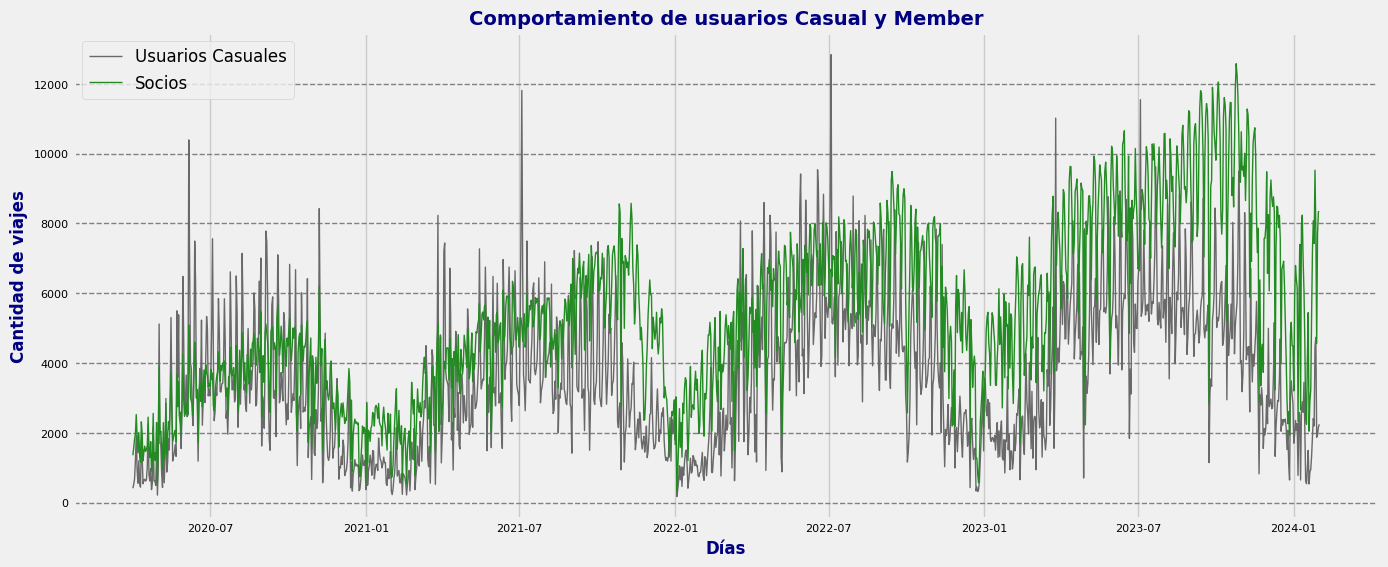

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data_resumen_dia['Date_started']]

ax.plot(x,data_resumen_dia['Casual'], color = "dimgray", linewidth = 1, label='Usuarios Casuales')
ax.plot(x,data_resumen_dia['Member'], color = "forestgreen", linewidth = 1, label='Socios')

ax.set_title('Comportamiento de usuarios Casual y Member', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.legend(prop={'size': 12}, loc = 'upper left')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.xticks(rotation=0)


plt.show()


Graficamos el comportamiento de temperatura en el tiempo.

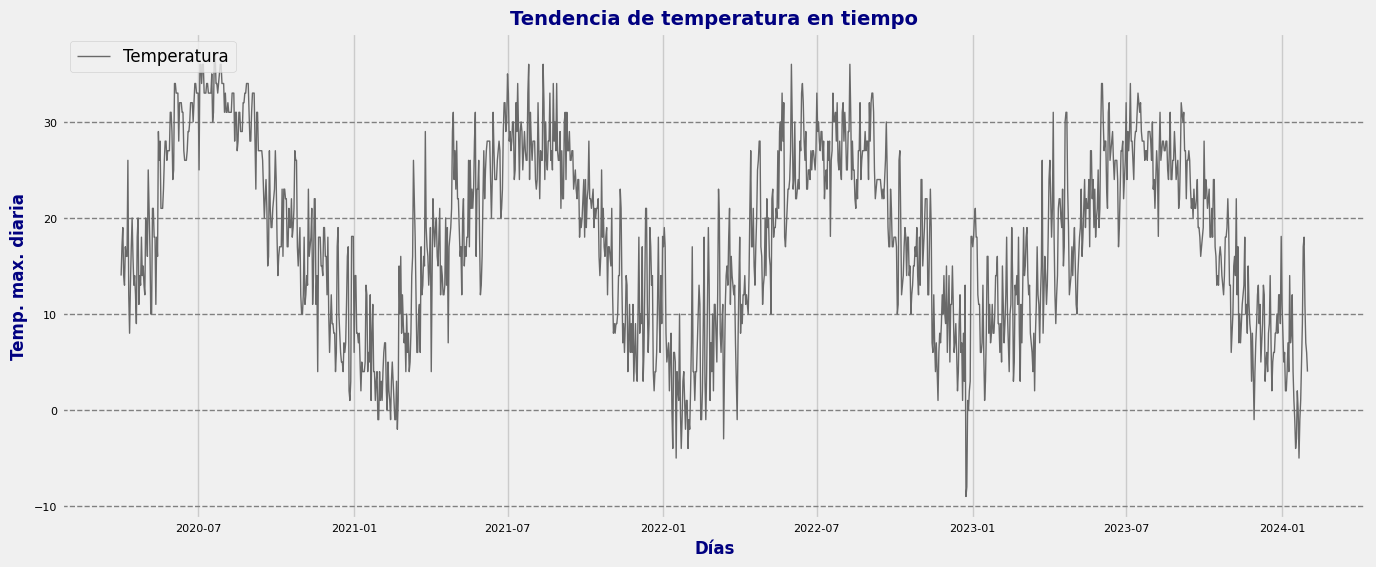

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data_resumen_dia['Date_started']]

ax.plot(x,data_resumen_dia['Temperatura máxima diaria'], color = "dimgray", linewidth = 1, label='Temperatura')

ax.set_title('Tendencia de temperatura en tiempo', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Temp. max. diaria", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.legend(prop={'size': 12}, loc = 'upper left')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.show()

Graficamos el total de viajes por mes.

In [ ]:
data_resumen_am=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/resumen_por_anyo_mes.csv')
data_resumen_am.head(5)

Year_started  Month_started  Casual  Member  Member_Casual_count
0          2020              4   26809   48662                75471
1          2020              5   75546   73505               149051
2          2020              6  116310   97737               214047
3          2020              7  117737  110610               228347
4          2020              8  127718  123885               251603

In [ ]:
data_resumen_am['Year_started']=data_resumen_am['Year_started'].astype("string")
data_resumen_am['Month_started']=data_resumen_am['Month_started'].astype("string")

In [ ]:
data_resumen_am['Year_Month']=data_resumen_am.Year_started.str.cat(data_resumen_am.Month_started, sep='-')

In [ ]:
data_resumen_am.head()

Year_started Month_started  Casual  Member  Member_Casual_count Year_Month
0         2020             4   26809   48662                75471     2020-4
1         2020             5   75546   73505               149051     2020-5
2         2020             6  116310   97737               214047     2020-6
3         2020             7  117737  110610               228347     2020-7
4         2020             8  127718  123885               251603     2020-8

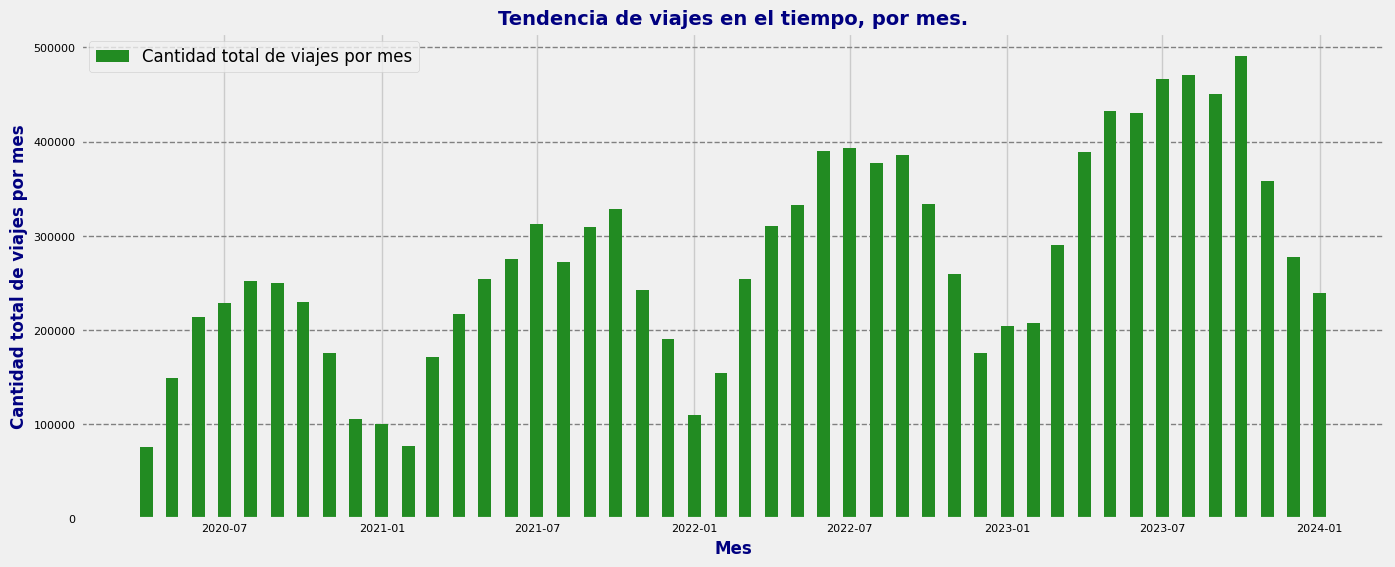

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

x = [dt.datetime.strptime(d,'%Y-%m').date() for d in data_resumen_am['Year_Month']]

width = 15

ax.bar(x, data_resumen_am['Member_Casual_count'], width= width, label='Cantidad total de viajes por mes', align = 'center', color='forestgreen')

plt.legend(prop={'size': 12}, loc='best')

ax.set_title('Tendencia de viajes en el tiempo, por mes.', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes por mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')


Creamos las visualizaciones de los viajes por año y por mes, de cada variable estudiada "Member" y "Casual".

In [ ]:
#creamos el conjunto de datos dividido por año
data_resumen_am_2020=data_resumen_am[data_resumen_am.Year_started.isin(['2020'])]
data_resumen_am_2021=data_resumen_am[data_resumen_am.Year_started.isin(['2021'])]
data_resumen_am_2022=data_resumen_am[data_resumen_am.Year_started.isin(['2022'])]
data_resumen_am_2023=data_resumen_am[data_resumen_am.Year_started.isin(['2023'])]

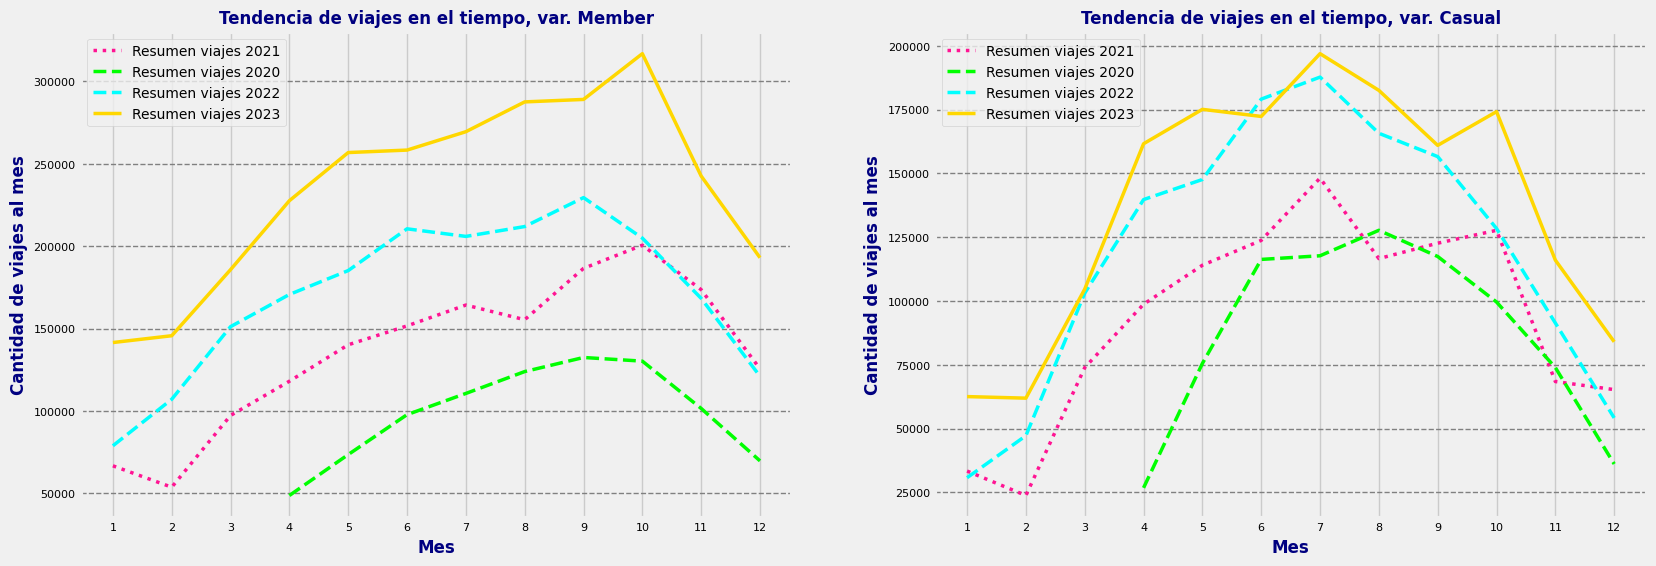

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axis[0].plot(data_resumen_am_2021['Month_started'],data_resumen_am_2021['Member'], color = "deeppink", linewidth = 2.5, label='Resumen viajes 2021',linestyle= ":")
axis[0].plot(data_resumen_am_2020['Month_started'],data_resumen_am_2020['Member'], color = "lime", linewidth = 2.5, label='Resumen viajes 2020', linestyle= "--")
axis[0].plot(data_resumen_am_2022['Month_started'],data_resumen_am_2022['Member'], color = "aqua", linewidth = 2.5, label='Resumen viajes 2022',linestyle= "--")
axis[0].plot(data_resumen_am_2023['Month_started'],data_resumen_am_2023['Member'], color = "gold", linewidth = 2.5, label='Resumen viajes 2023')

axis[1].plot(data_resumen_am_2021['Month_started'],data_resumen_am_2021['Casual'], color = "deeppink", linewidth = 2.5, label='Resumen viajes 2021',linestyle= ":")
axis[1].plot(data_resumen_am_2020['Month_started'],data_resumen_am_2020['Casual'], color = "lime", linewidth = 2.5, label='Resumen viajes 2020', linestyle= "--")
axis[1].plot(data_resumen_am_2022['Month_started'],data_resumen_am_2022['Casual'], color = "aqua", linewidth = 2.5, label='Resumen viajes 2022',linestyle= "--")
axis[1].plot(data_resumen_am_2023['Month_started'],data_resumen_am_2023['Casual'], color = "gold", linewidth = 2.5, label='Resumen viajes 2023')

axis[0].set_title('Tendencia de viajes en el tiempo, var. Member', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[0].set_xlabel("Mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[0].set_ylabel("Cantidad de viajes al mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[0].legend(prop={'size': 10}, loc = 'upper left')
axis[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axis[1].set_title('Tendencia de viajes en el tiempo, var. Casual', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[1].set_xlabel("Mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[1].set_ylabel("Cantidad de viajes al mes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axis[1].legend(prop={'size': 10}, loc = 'upper left')
axis[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Graficamos  el comportamiento de usuarios en un día especifico, por horas.

In [ ]:
#Leemos el archivo con los datos
data_resumen_dh=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/resumen_por_dia_hora.csv')
data_resumen_dh.head()

Year_started Date_started  Hour_started  Casual  Member  \
0          2020   2020-04-01             0       0       1   
1          2020   2020-04-01             1       0       2   
2          2020   2020-04-01             2       1       0   
3          2020   2020-04-01             3       0       2   
4          2020   2020-04-01             4       2       3   

   Member_Casual_count  
0                    1  
1                    2  
2                    1  
3                    2  
4                    5

Dia 08-01-2024.

In [ ]:
data_08012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-08'])]
data_08012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33005          2024   2024-01-08             0      19      28   
33006          2024   2024-01-08             1      11      17   
33007          2024   2024-01-08             2       2      12   
33008          2024   2024-01-08             3       2       8   
33009          2024   2024-01-08             4       6      14   

       Member_Casual_count  
33005                   47  
33006                   28  
33007                   14  
33008                   10  
33009                   20

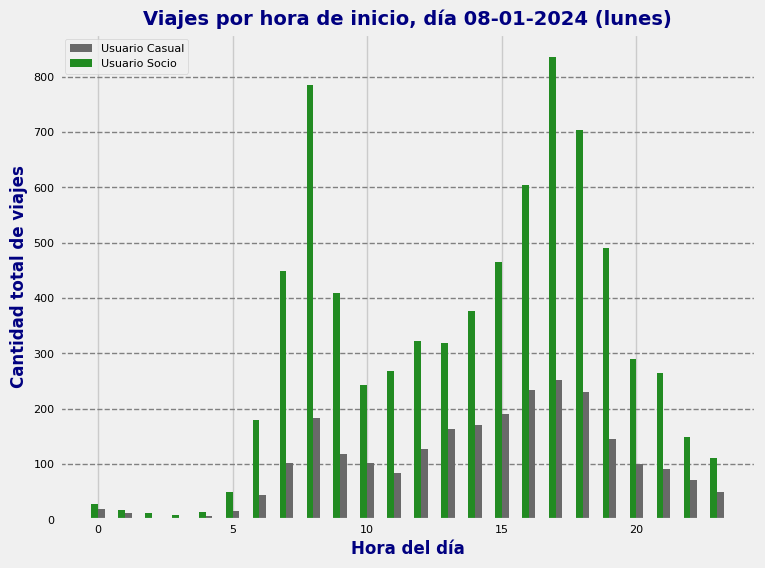

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_08012024['Hour_started']+width/2, data_08012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_08012024['Hour_started']-width/2, data_08012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 08-01-2024 (lunes)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 09-01-2024.

In [ ]:
data_09012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-09'])]
data_09012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33029          2024   2024-01-09             0      11      36   
33030          2024   2024-01-09             1       3       7   
33031          2024   2024-01-09             2       6       8   
33032          2024   2024-01-09             3       4       2   
33033          2024   2024-01-09             4       3      19   

       Member_Casual_count  
33029                   47  
33030                   10  
33031                   14  
33032                    6  
33033                   22

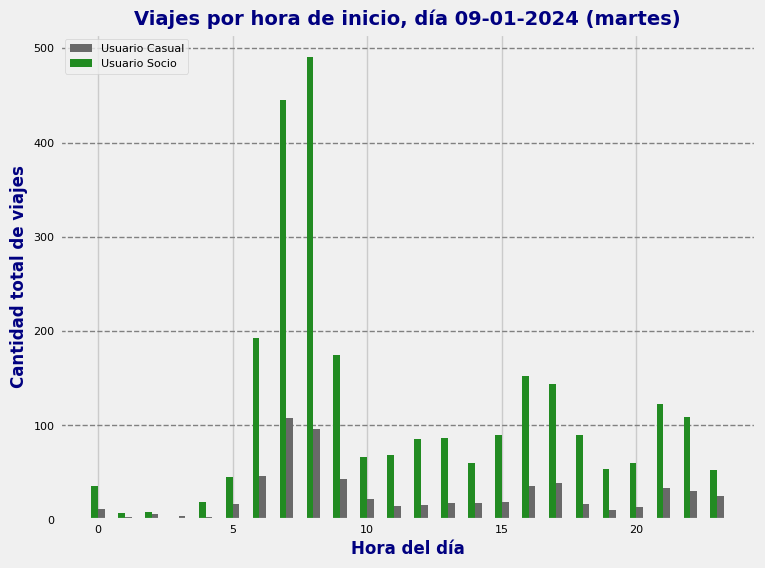

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_09012024['Hour_started']+width/2, data_09012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_09012024['Hour_started']-width/2, data_09012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 09-01-2024 (martes)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 10-01-2024.

In [ ]:
data_10012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-10'])]
data_10012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33053          2024   2024-01-10             0      16      29   
33054          2024   2024-01-10             1       6      12   
33055          2024   2024-01-10             2       1       7   
33056          2024   2024-01-10             3       2       0   
33057          2024   2024-01-10             4       4       8   

       Member_Casual_count  
33053                   45  
33054                   18  
33055                    8  
33056                    2  
33057                   12

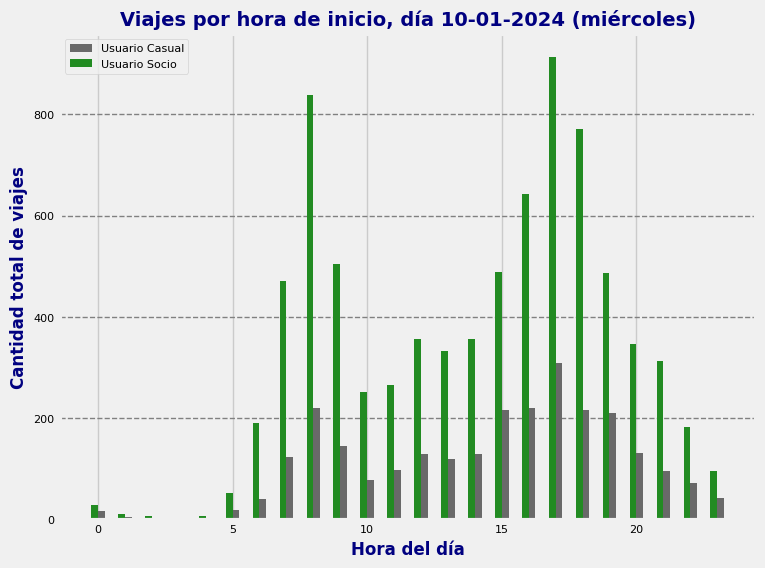

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_10012024['Hour_started']+width/2, data_10012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_10012024['Hour_started']-width/2, data_10012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 10-01-2024 (miércoles)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 11-01-2024.

In [ ]:
data_11012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-11'])]
data_11012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33077          2024   2024-01-11             0      31      51   
33078          2024   2024-01-11             1      11      14   
33079          2024   2024-01-11             2       2       9   
33080          2024   2024-01-11             3       6       9   
33081          2024   2024-01-11             4       6      14   

       Member_Casual_count  
33077                   82  
33078                   25  
33079                   11  
33080                   15  
33081                   20

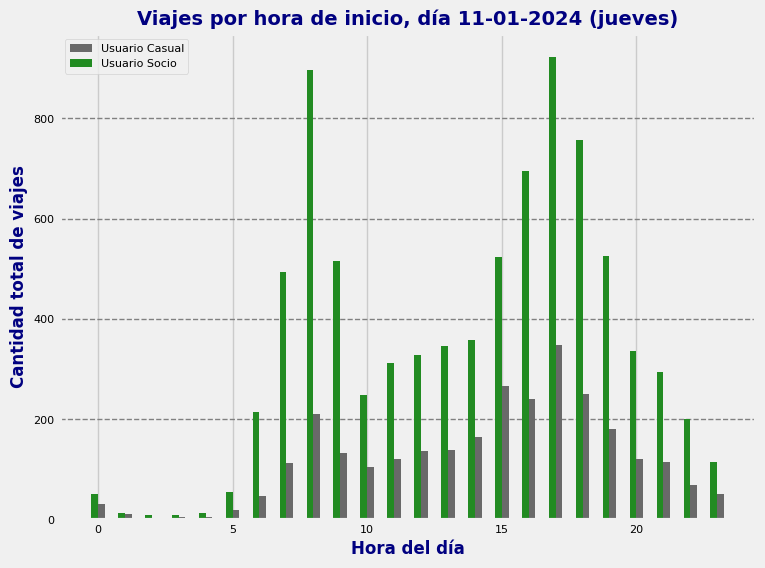

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_11012024['Hour_started']+width/2, data_11012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_11012024['Hour_started']-width/2, data_11012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 11-01-2024 (jueves)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 12-01-2024.

In [ ]:
data_12012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-12'])]
data_12012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33101          2024   2024-01-12             0      36      63   
33102          2024   2024-01-12             1      17      24   
33103          2024   2024-01-12             2       9      26   
33104          2024   2024-01-12             3       4       9   
33105          2024   2024-01-12             4       4      13   

       Member_Casual_count  
33101                   99  
33102                   41  
33103                   35  
33104                   13  
33105                   17

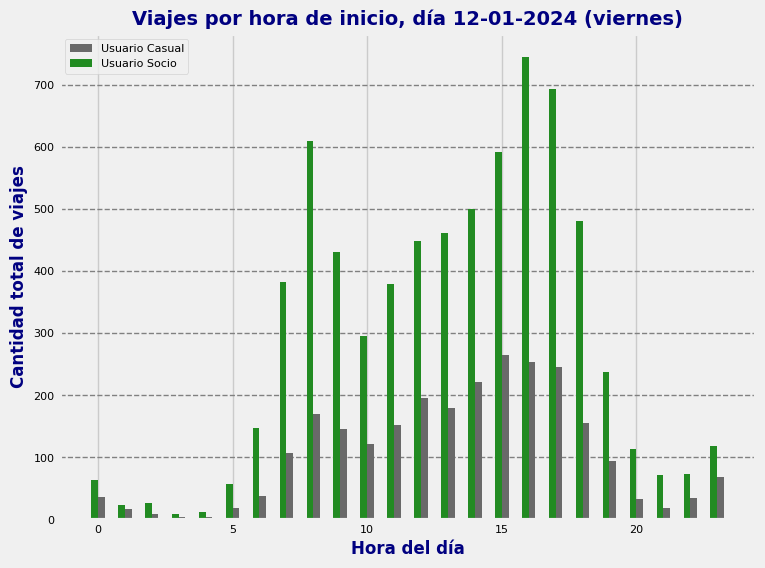

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_12012024['Hour_started']+width/2, data_12012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_12012024['Hour_started']-width/2, data_12012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 12-01-2024 (viernes)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 13-01-2024.

In [ ]:
data_13012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-13'])]
data_13012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33125          2024   2024-01-13             0      37      72   
33126          2024   2024-01-13             1      36      68   
33127          2024   2024-01-13             2      21      47   
33128          2024   2024-01-13             3      15      20   
33129          2024   2024-01-13             4      10      15   

       Member_Casual_count  
33125                  109  
33126                  104  
33127                   68  
33128                   35  
33129                   25

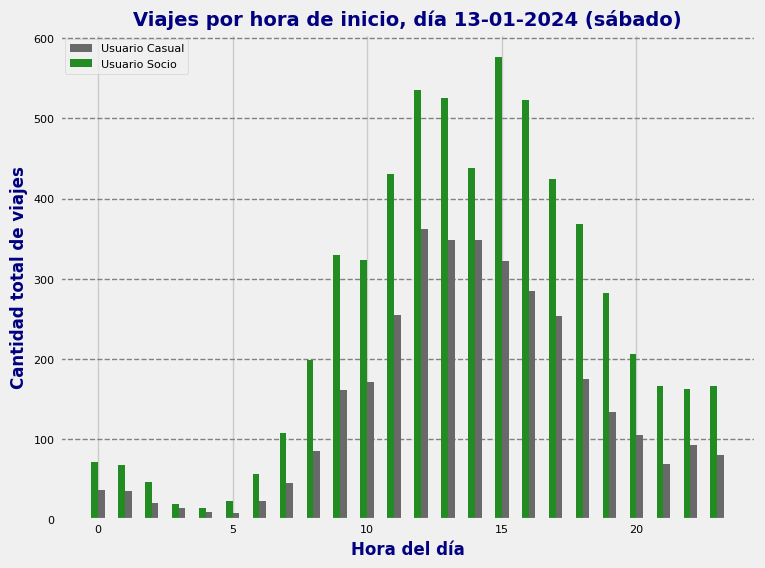

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_13012024['Hour_started']+width/2, data_13012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_13012024['Hour_started']-width/2, data_13012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 13-01-2024 (sábado)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Dia 14-01-2024.

In [ ]:
data_14012024=data_resumen_dh[data_resumen_dh.Date_started.isin(['2024-01-14'])]
data_14012024.head()

Year_started Date_started  Hour_started  Casual  Member  \
33149          2024   2024-01-14             0      66     115   
33150          2024   2024-01-14             1      47      76   
33151          2024   2024-01-14             2      22      32   
33152          2024   2024-01-14             3      12      16   
33153          2024   2024-01-14             4      15      24   

       Member_Casual_count  
33149                  181  
33150                  123  
33151                   54  
33152                   28  
33153                   39

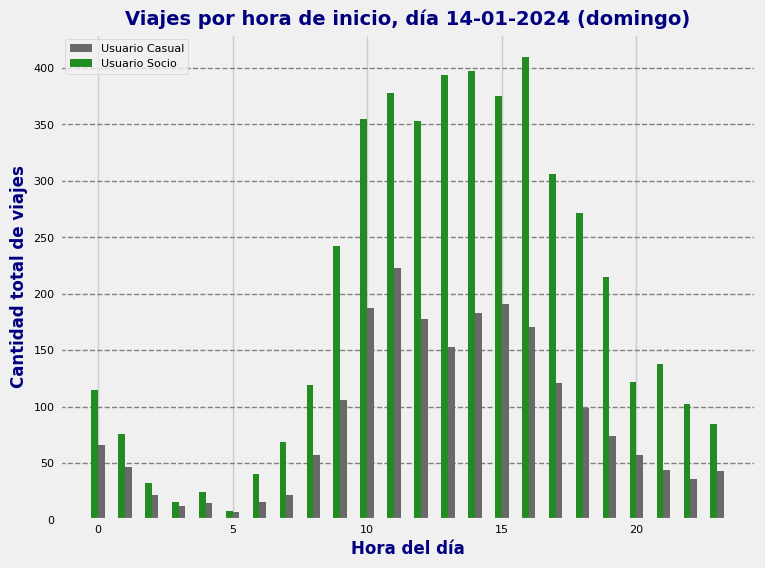

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.25

ax.bar(data_14012024['Hour_started']+width/2, data_14012024['Casual'], width= width, label='Usuario Casual', align = 'center', color='dimgray')
ax.bar(data_14012024['Hour_started']-width/2, data_14012024['Member'], width= width, label='Usuario Socio', align = 'center', color='forestgreen')

plt.legend(loc='upper left')

ax.set_title('Viajes por hora de inicio, día 14-01-2024 (domingo)', loc = "Center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'navy'})
ax.set_xlabel("Hora del día", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
ax.set_ylabel("Cantidad total de viajes", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Vamos a identificar los días con mayor cantidad viajes, para la variable "Casual" y "Member". Para la variable "Casual", el dia con mayor viajes es 04-07-2022 (vamos a trabajar con el día 04-07-2023, del año 2023), para la variable "Member" - 25-10-2023.

In [ ]:
data1=data_resumen_dia.sort_values(by=['Casual'], ascending=False)

In [ ]:
data1.head(10)

Date_started  Casual  Member  Member_Casual_count  Temporada  Dia_semana  \
824    2022-07-04   12839    6692                19531          3           1   
459    2021-07-04   11815    5068                16883          3           7   
1189   2023-07-04   11550    8380                19930          3           2   
1089   2023-03-26   11020    7650                18670          2           7   
66     2020-06-06   10395    5087                15482          3           6   
1207   2023-07-22    9624    8742                18366          3           6   
808    2022-06-18    9539    7218                16757          3           6   
1305   2023-10-28    9505   10669                20174          4           6   
788    2022-05-29    9419    5681                15100          2           7   
823    2022-07-03    9053    5580                14633          3           7   

      Dia_laboral  Feriado_WDC  Year  Month  Day  Temperatura mínima diaria  \
824             1            1  2022      7    4                       22.0   
459             0            0  2021      7    4                       17.0   
1189            1            1  2023      7    4                       22.0   
1089            0            0  2023      3   26                       11.0   
66              0            0  2020      6    6                       21.0   
1207            0            0  2023      7   22                       23.0   
808             0            0  2022      6   18                       24.0   
1305            0            0  2023     10   28                       17.0   
788             0            0  2022      5   29                       19.0   
823             0            0  2022      7    3                       23.0   

      Temperatura máxima diaria  Velocidad del viento máxima constante  \
824                        28.0                                   11.0   
459                        29.0                                   22.0   
1189                       27.0                                   29.0   
1089                       12.0                                   11.0   
66                         33.0                                   28.0   
1207                       28.0                                   21.0   
808                        29.0                                   26.0   
1305                       19.0                                   13.0   
788                        23.0                                   11.0   
823                        30.0                                   35.0   

      Precipitaciones totales diarias      Presión  Descripción  
824                          0.000000  1019.099976          0.0  
459                          0.000000  1012.299988          1.0  
1189                        23.100000  1011.700012          2.0  
1089                         5.300000  1007.900024          0.0  
66                          22.799999  1010.799988          1.0  
1207                         0.000000  1009.599976          0.0  
808                          0.000000  1007.099976          0.0  
1305                         0.000000  1018.599976          0.0  
788                          0.500000  1014.200012          0.0  
823                          0.000000  1017.559143          2.0

In [ ]:
data2=data.sort_values(by=['Member'], ascending=False)

In [ ]:
data2.head(5)

Casual  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                               
2023-10-25      5403   12580                17983          4           3   
2023-10-26      5750   12274                18024          4           4   
2023-10-04      5207   12055                17262          4           3   
2023-09-27      5226   11903                17129          4           3   
2023-10-24      5085   11898                16983          4           2   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2023-10-25              1            0  2023     10   25   
2023-10-26              1            0  2023     10   26   
2023-10-04              1            0  2023     10    4   
2023-09-27              1            0  2023      9   27   
2023-10-24              1            0  2023     10   24   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2023-10-25                         11.0                       14.0   
2023-10-26                         16.0                       18.0   
2023-10-04                         18.0                       23.0   
2023-09-27                         16.0                       16.0   
2023-10-24                          8.0                       12.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2023-10-25                                     15.0   
2023-10-26                                     13.0   
2023-10-04                                     11.0   
2023-09-27                                     22.0   
2023-10-24                                      9.0   

              Precipitaciones totales diarias      Presión  Descripción  
Date_started                                                             
2023-10-25                                0.0  1027.400024          0.0  
2023-10-26                                0.0  1025.400024          0.0  
2023-10-04                                0.0  1021.500000          0.0  
2023-09-27                                1.2  1026.500000          0.0  
2023-10-24                                0.0  1026.199951          0.0

Vamos a generar el archivo con los datos del día especifico, con la mayor cantidad de viajes. Para eso vamos a acceder al archivo completo de los datos.

In [ ]:
data_completo=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/data_cbs_compl_2020-2024.csv')

In [ ]:
data_completo.head(5)

Unnamed: 0           ride_id rideable_type  start_lat  start_lng  \
0           0  C04E20007D039277   docked_bike  38.918809 -77.041571   
1           1  A488C0D9F4761D06  classic_bike  38.880300 -76.986200   
2           2  9E7E97A927A85552  classic_bike  38.880300 -76.986200   
3           3  565C5C331ABAD77B  classic_bike  38.847129 -77.112550   
4           4  7576B3F4B4D6ADFF  classic_bike  38.888282 -77.111066   

     end_lat    end_lng Date_started Time_started  Date_ended  ...  \
0  38.899680 -77.041539   2020-12-02     09:10:36  2020-12-02  ...   
1  38.888097 -77.038325   2020-12-31     12:46:29  2020-12-31  ...   
2  38.888097 -77.038325   2020-12-31     12:47:03  2020-12-31  ...   
3  38.842600 -77.050200   2020-12-29     13:50:51  2020-12-29  ...   
4  38.882788 -77.103148   2020-12-27     12:30:28  2020-12-27  ...   

  Month_started  Day_started  Hour_started  Year_ended  Month_ended  \
0            12            2             9        2020           12   
1            12           31            12        2020           12   
2            12           31            12        2020           12   
3            12           29            13        2020           12   
4            12           27            12        2020           12   

   Day_ended  Hour_ended  Casual  Member  Member_Casual_count  
0          2           9       1       0                    1  
1         31          14       1       0                    1  
2         31          14       1       0                    1  
3         29          14       0       1                    1  
4         27          12       0       1                    1  

[5 rows x 22 columns]

Filtramos la informacion de un día 25-10-2023 para el usuario "Member" y guardamos en un archvio.

In [ ]:
result_m=data_completo[(data_completo['Date_started']=='2023-10-25') & (data_completo['Member']==1)]

In [ ]:
result_m.head(5)

Unnamed: 0           ride_id  rideable_type  start_lat  start_lng  \
11246855    11246855  1A096F53EDE851AC   classic_bike  38.901104 -77.028061   
11246938    11246938  BA6C8C7D1889BF53  electric_bike  38.922601 -77.070353   
11246948    11246948  314E06E0ED9B9C0C   classic_bike  38.901104 -77.028061   
11246986    11246986  D4828583C92D5940   classic_bike  38.922324 -77.027086   
11247017    11247017  3BC28C67336DA547   classic_bike  38.922324 -77.027086   

            end_lat    end_lng Date_started Time_started  Date_ended  ...  \
11246855  38.900930 -77.018677   2023-10-25     08:46:37  2023-10-25  ...   
11246938  38.916936 -77.029631   2023-10-25     16:40:49  2023-10-25  ...   
11246948  38.900930 -77.018677   2023-10-25     13:55:53  2023-10-25  ...   
11246986  38.900358 -77.012108   2023-10-25     09:43:13  2023-10-25  ...   
11247017  38.920387 -77.025672   2023-10-25     19:14:33  2023-10-25  ...   

         Month_started  Day_started  Hour_started  Year_ended  Month_ended  \
11246855            10           25             8        2023           10   
11246938            10           25            16        2023           10   
11246948            10           25            13        2023           10   
11246986            10           25             9        2023           10   
11247017            10           25            19        2023           10   

          Day_ended  Hour_ended  Casual  Member  Member_Casual_count  
11246855         25           8       0       1                    1  
11246938         25          16       0       1                    1  
11246948         25          14       0       1                    1  
11246986         25          10       0       1                    1  
11247017         25          19       0       1                    1  

[5 rows x 22 columns]

In [ ]:
result_m.to_csv('result_m.csv')

Filtramos la informacion de un día 04-07-2023 para el usuario "Casual" y guardamos en un archvio.

In [ ]:
result_c=data_completo[(data_completo['Date_started']=='2023-07-04') & (data_completo['Casual']==1)]

In [ ]:
result_c.head(5)

Unnamed: 0           ride_id rideable_type  start_lat  start_lng  \
9860160     9860160  44ABB969210587DD  classic_bike  38.931322 -77.028247   
9860181     9860181  BD088083CA7E07A8  classic_bike  38.909701 -77.085646   
9860184     9860184  C11EFD7E3CE8F327  classic_bike  38.898301 -77.039643   
9860185     9860185  727985C8732C802B  classic_bike  38.898301 -77.039643   
9860220     9860220  80FE870CBF0C9E49  classic_bike  38.912644 -77.045640   

           end_lat    end_lng Date_started Time_started  Date_ended  ...  \
9860160  38.901755 -77.051084   2023-07-04     06:22:17  2023-07-04  ...   
9860181  38.901755 -77.051084   2023-07-04     18:56:34  2023-07-04  ...   
9860184  38.928893 -77.036250   2023-07-04     21:52:55  2023-07-04  ...   
9860185  38.928893 -77.036250   2023-07-04     21:53:03  2023-07-04  ...   
9860220  38.901755 -77.051084   2023-07-04     18:59:40  2023-07-04  ...   

        Month_started  Day_started  Hour_started  Year_ended  Month_ended  \
9860160             7            4             6        2023            7   
9860181             7            4            18        2023            7   
9860184             7            4            21        2023            7   
9860185             7            4            21        2023            7   
9860220             7            4            18        2023            7   

         Day_ended  Hour_ended  Casual  Member  Member_Casual_count  
9860160          4           6       1       0                    1  
9860181          4          19       1       0                    1  
9860184          4          22       1       0                    1  
9860185          4          22       1       0                    1  
9860220          4          19       1       0                    1  

[5 rows x 22 columns]

In [ ]:
result_c.to_csv('result_c.csv')

Se procederá con la creacion y visualizacion de las mapas de densidad de viajes en PowerBI.

Viasualización: densidad de viajes para el día 04-07-2023 de usuarios "Casual".

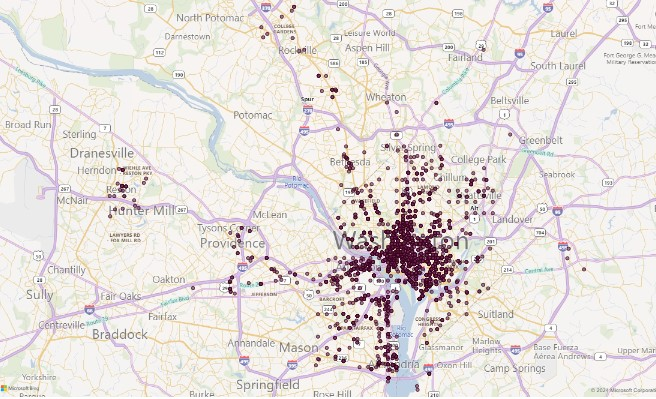

# Análisis del conjunto de datos, aplicacion de modelos de aprendizaje supervisado.

### Preparación de los datos y análisis previo.

Leemos el archivo final, visualizamos la estructura y las caracteristicas.

In [160]:
data=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/data.csv')

In [161]:
data=data.drop(["Unnamed: 0"], axis=1)

In [162]:
data.head()

Date_started  Casual  Member  Member_Casual_count  Temporada  Dia_semana  \
0   2020-04-01     410    1355                 1765          2           3   
1   2020-04-02     520    1565                 2085          2           4   
2   2020-04-03     679    1814                 2493          2           5   
3   2020-04-04    1195    1965                 3160          2           6   
4   2020-04-05    1929    2523                 4452          2           7   

   Dia_laboral  Feriado_WDC  Year  Month  Day  Temperatura mínima diaria  \
0            1            0  2020      4    1                        6.0   
1            1            0  2020      4    2                        6.0   
2            1            0  2020      4    3                        9.0   
3            0            0  2020      4    4                       11.0   
4            0            0  2020      4    5                       10.0   

   Temperatura máxima diaria  Velocidad del viento máxima constante  \
0                       14.0                                   29.0   
1                       17.0                                   45.0   
2                       19.0                                   45.0   
3                       14.0                                   32.0   
4                       13.0                                   13.0   

   Precipitaciones totales diarias      Presión  Descripción  
0                              3.0  1009.900024          1.0  
1                              0.0  1011.700012          0.0  
2                              0.0  1009.599976          0.0  
3                              0.0  1013.200012          0.0  
4                              0.0  1018.299988          0.0

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date_started                           1401 non-null   object 
 1   Casual                                 1401 non-null   int64  
 2   Member                                 1401 non-null   int64  
 3   Member_Casual_count                    1401 non-null   int64  
 4   Temporada                              1401 non-null   int64  
 5   Dia_semana                             1401 non-null   int64  
 6   Dia_laboral                            1401 non-null   int64  
 7   Feriado_WDC                            1401 non-null   int64  
 8   Year                                   1401 non-null   int64  
 9   Month                                  1401 non-null   int64  
 10  Day                                    1401 non-null   int64  
 11  Temp

Convertimos el dataset "data" en una serie temporal, con la periodicidad "Day" y verificamos que el índice temporal esté completo.

In [164]:
data['Date_started'] = pd.to_datetime(data['Date_started'], format='%Y-%m-%d')
data = data.set_index('Date_started')
data = data.asfreq('D')
data = data.sort_index()

In [165]:
(data.index == pd.date_range(
                    start = data.index.min(),
                    end   = data.index.max(),
                    freq  = data.index.freq)
).all()

True

Generamos la Matriz de correlación para el conjunto de datos completo, con el objetivo de elegir las variables a trabajar.

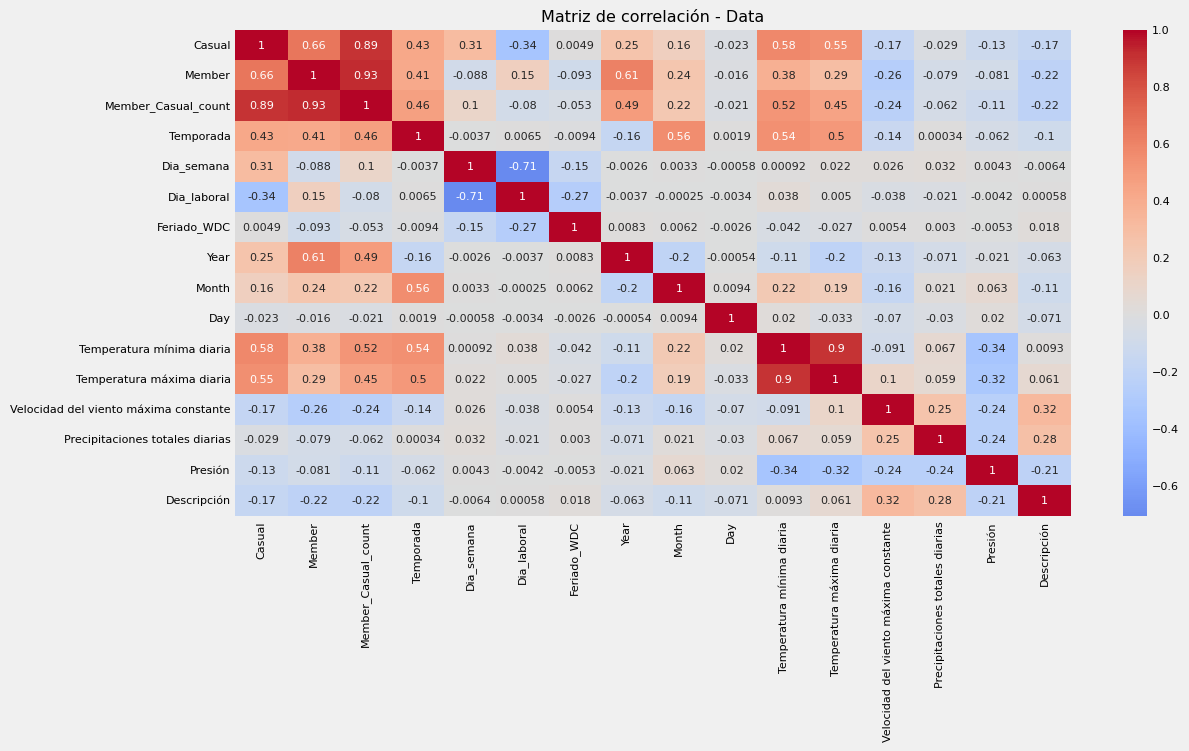

In [166]:
corr_data = data.corr()

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(corr_data, cmap="coolwarm", center=0, ax=ax, annot=True)
ax.set_title("Matriz de correlación - Data")

plt.show()

De acuerdo con el resultado de la matriz de la correlacion, se van a elegir las variables que tienen mayor correlacion con la variable-objetivo y se generan diferentes combinaciones de variables a ser evaluadas en cada modelo.

In [167]:
selected_features=['Temporada','Dia_semana','Dia_laboral', 'Feriado_WDC', 'Year', 'Month', 'Day','Temperatura mínima diaria', 'Temperatura máxima diaria', 'Presión', 'Velocidad del viento máxima constante', 'Precipitaciones totales diarias', 'Descripción']
selected_features_1=['Temporada','Dia_semana','Dia_laboral', 'Year', 'Month', 'Day','Temperatura mínima diaria', 'Temperatura máxima diaria', 'Velocidad del viento máxima constante','Descripción']
selected_features_2=['Temporada','Dia_semana','Dia_laboral','Feriado_WDC','Year', 'Month', 'Day','Temperatura mínima diaria', 'Temperatura máxima diaria', 'Presión', 'Velocidad del viento máxima constante']
selected_features_3=['Temporada','Dia_semana','Year', 'Month', 'Temperatura mínima diaria', 'Temperatura máxima diaria']
selected_features_4=['Temporada','Dia_semana', 'Month', 'Temperatura mínima diaria', 'Temperatura máxima diaria']
selected_features_5=['Temporada','Dia_semana','Dia_laboral', 'Year', 'Month', 'Day','Temperatura mínima diaria', 'Temperatura máxima diaria', 'Velocidad del viento máxima constante','Presión', 'Descripción']
selected_features_6=['Temporada','Dia_semana', 'Month', 'Temperatura mínima diaria', 'Temperatura máxima diaria']
selected_features_7=['Temporada','Dia_semana','Dia_laboral', 'Year', 'Month', 'Day','Temperatura mínima diaria', 'Temperatura máxima diaria', 'Presión', 'Velocidad del viento máxima constante', 'Precipitaciones totales diarias', 'Descripción']


Todas las variables y modelos para la prediccion de la variable "Casual" se van a identificar con guion bajo y letra c (_c).
Divididmos el dataset en el dataset de entrenamiento y validacion.

In [168]:
X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data['Member'], test_size=0.25, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(data[selected_features_5], data['Casual'], test_size=0.25, random_state=42)

Visualizamos las caracteristicas de los datos generados de X_train, X_test, y_train, y_test.

In [169]:
print('Para variable Member, X_train:', {X_train.shape})
print('Para variable Member, X_test:', {X_test.shape})
print('Para variable Member, y_train:', {y_train.shape})
print('Para variable Member, y_test:', {y_test.shape})
print('_______________________________________________')
print('Para variable Casual, X_train:', {X_train_c.shape})
print('Para variable Casual, X_test:', {X_test_c.shape})
print('Para variable Casual, y_train:', {y_train_c.shape})
print('Para variable Casual, y_test:', {y_test_c.shape})

Para variable Member, X_train: {(1050, 13)}
Para variable Member, X_test: {(351, 13)}
Para variable Member, y_train: {(1050,)}
Para variable Member, y_test: {(351,)}
_______________________________________________
Para variable Casual, X_train: {(1050, 11)}
Para variable Casual, X_test: {(351, 11)}
Para variable Casual, y_train: {(1050,)}
Para variable Casual, y_test: {(351,)}


Antes de crear un modelo, necesitamos estandarizar nuestras características independientes. Procedemos con la normalizacion de los datos X_train, X_test utilizando la funcion MinMaxScaler.

In [170]:
scaler = MinMaxScaler()
X_trainn = scaler.fit_transform(X_train)
X_testn = scaler.transform(X_test)

In [171]:
scaler = MinMaxScaler()
X_trainn_c = scaler.fit_transform(X_train_c)
X_testn_c = scaler.transform(X_test_c)

Generamos la grafica violinplot para las variables sin normalizar, del conjunto de datos original.

<ipython-input-172-794b9fe96be7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(data[selected_features].columns, rotation=90)
<ipython-input-172-794b9fe96be7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(data[selected_features_5].columns, rotation=90)


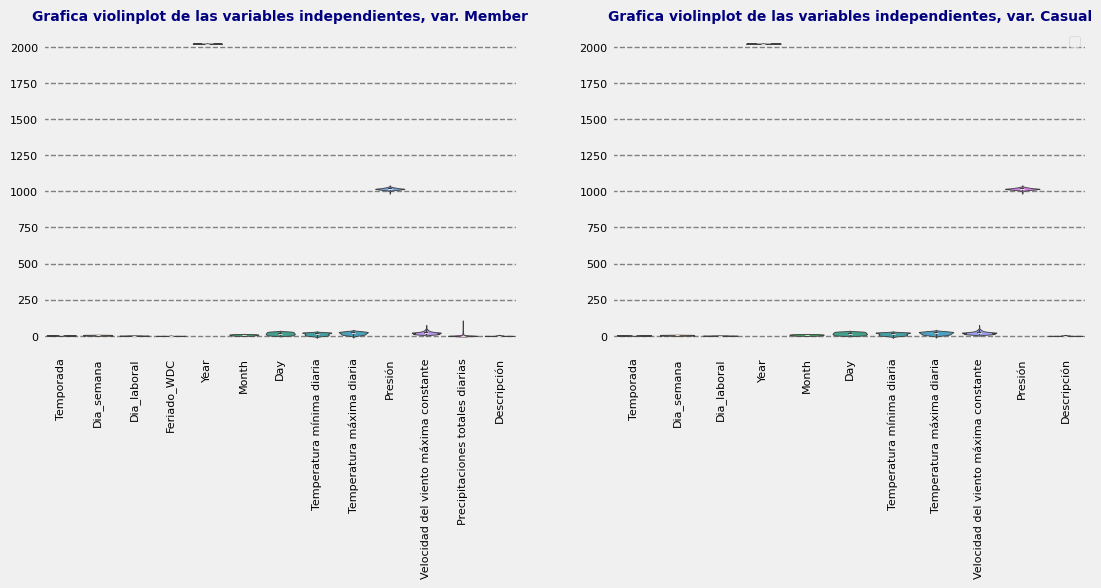

In [172]:
fig, axis = plt.subplots(ncols=2, figsize=(12, 4))

sns.violinplot(X_train, ax=axis[0])
sns.violinplot(X_train_c, ax=axis[1])

axis[0].set_title('Grafica violinplot de las variables independientes, var. Member', loc = "Center", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axis[1].set_title('Grafica violinplot de las variables independientes, var. Casual', loc = "Center", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axis[0].set_xticklabels(data[selected_features].columns, rotation=90)
axis[1].set_xticklabels(data[selected_features_5].columns, rotation=90)

axis[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axis[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.legend(prop={'size': 10}, loc='best')

Generamos la grafica violinplot para las variables normalizadas, X_train y X_test. Se puede evidenciar que los datos se encuentran normalizados, en el rango (0,1).

<ipython-input-173-56ec7f741898>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(data[selected_features].columns, rotation=90)
<ipython-input-173-56ec7f741898>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(data[selected_features_5].columns, rotation=90)


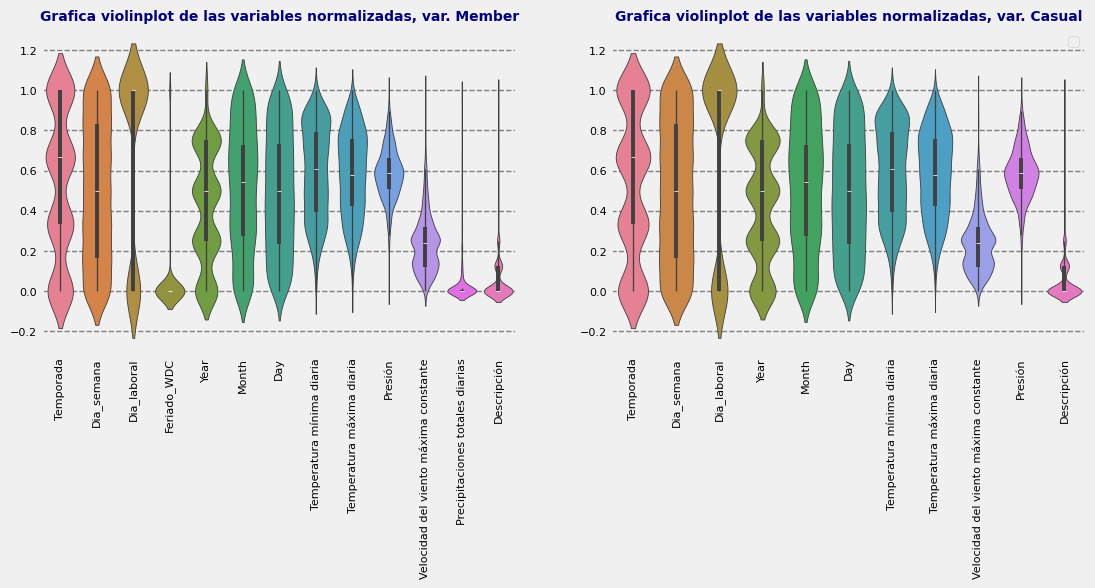

In [173]:
fig, axis = plt.subplots(ncols=2, figsize=(12, 4))

sns.violinplot(X_trainn, ax=axis[0])
sns.violinplot(X_trainn_c, ax=axis[1])

axis[0].set_title('Grafica violinplot de las variables normalizadas, var. Member', loc = "Center", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axis[1].set_title('Grafica violinplot de las variables normalizadas, var. Casual', loc = "Center", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axis[0].set_xticklabels(data[selected_features].columns, rotation=90)
axis[1].set_xticklabels(data[selected_features_5].columns, rotation=90)

axis[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axis[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.legend(prop={'size': 10}, loc='best')

### Modelo Linear Regression

Se procede a generar y ejecutar el modelo de ML Linear Regression para predecir las variables "Member" y "Casual" sobre el conjunto de datos X_test y X_test_c.

In [174]:
modelo_lr = linear_model.LinearRegression()
modelo_lr_c = linear_model.LinearRegression()

modelo_lr.fit(X_trainn, y_train)
modelo_lr_c.fit(X_trainn_c, y_train_c)

y_pred = modelo_lr.predict(X_testn)
y_pred_c = modelo_lr_c.predict(X_testn_c)

Se procede a calcular los coefficientes Intercept y Slope de ambos modelos.

In [175]:
print(f"Coef. intercept Member: {modelo_lr.intercept_}")
print(f"Coef. slope Member: {modelo_lr.coef_}")
print(f"_________________________________________________")
print(f"Coef. intercept Casual: {modelo_lr_c.intercept_}")
print(f"Coef. slope Casual: {modelo_lr_c.coef_}")

Coef. intercept Member: -566.455488436949
Coef. slope Member: [ 2021.40347136    37.78494631   694.88853929  -769.90611258
  6329.05985704   962.15685422  -221.09390393   348.51864306
  2876.48139955   -14.23237169 -1201.14154998   485.15627665
 -2952.72730919]
_________________________________________________
Coef. intercept Casual: -557.4975725572508
Coef. slope Casual: [  972.55178379   804.23829294 -1171.55535328  2706.62843518
  -155.15142291  -232.98520127  1519.16630282  4215.69688919
 -1440.47308435   423.07490419 -2355.4722912 ]


Se calculan los coeficientes de determinacion R2, RMSE, MAE, errores y accuracy de los modelos.

In [176]:
r_sq = modelo_lr.score(X_trainn, y_train)
r_sq_c = modelo_lr_c.score(X_trainn_c, y_train_c)

In [177]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse=sqrt(mse)

mse_c = mean_squared_error(y_true=y_test_c, y_pred=y_pred_c)
rmse_c=sqrt(mse_c)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2_c = r2_score(y_true=y_test_c, y_pred=y_pred_c)

errors = abs(y_pred - y_test)
errors_c = abs(y_pred_c - y_test_c)

print(f"Coef. of determination, Member: {r_sq}")
print(f'R-squared Member: {r2}')
print(f"El error (rmse) de test Member es: {rmse, mse}")
print(f'Errores Member: {errors}')
print(f'_________________________________________________')
print(f"Coef. of determination, Casual: {r_sq_c}")
print(f'R-squared Casual: {r2_c}')
print(f"El error (rmse) de test Casual es: {rmse_c, mse}")
print(f'Errores Casual: {errors_c}')

Coef. of determination, Member: 0.7596569376348121
R-squared Member: 0.7319656469261946
El error (rmse) de test Member es: (1248.0743016608137, 1557689.462466128)
Errores Member: Date_started
2023-03-29    2070.445917
2022-11-05     106.325658
2020-05-20     433.382851
2023-09-10    1036.603877
2022-03-08     158.555802
                 ...     
2020-10-17    1344.866759
2021-05-28    1088.369293
2023-03-18     257.121764
2021-04-16    1888.348536
2023-12-15    1725.971408
Name: Member, Length: 351, dtype: float64
_________________________________________________
Coef. of determination, Casual: 0.6510346786613113
R-squared Casual: 0.6492697786728576
El error (rmse) de test Casual es: (1202.176375709826, 1557689.462466128)
Errores Casual: Date_started
2023-03-29    1610.922315
2022-11-05    1839.762881
2020-05-20     349.921851
2023-09-10    2108.138765
2022-03-08       6.118835
                 ...     
2020-10-17    2003.812390
2021-05-28    1131.634971
2023-03-18    1561.610250
2021-

Calculamos el MAPE (mean absolute percentage error), MAE y Accuracy (precision de prediccion).

In [178]:
mape = 100 * (errors / y_test)
mape_c = 100 * (errors_c / y_test_c)

accuracy = 100 - np.mean(mape)
accuracy_c = 100 - np.mean(mape_c)


print('MAE Member:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy Member:', round(accuracy, 2), '%.')
print('MAPE Member:', mape)
print('_____________________________________________')
print('MAE Casual:', round(np.mean(errors_c), 2), 'degrees.')
print('Accuracy Casual:', round(accuracy_c, 2), '%.')
print('MAPE Casual:', mape_c)

MAE Member: 963.77 degrees.
Accuracy Member: 75.54 %.
MAPE Member: Date_started
2023-03-29    24.873209
2022-11-05     1.438194
2020-05-20    21.876974
2023-09-10    12.920402
2022-03-08     3.070407
                ...    
2020-10-17    26.416554
2021-05-28    28.476434
2023-03-18     4.310507
2021-04-16    48.037358
2023-12-15    20.969158
Name: Member, Length: 351, dtype: float64
_____________________________________________
MAE Casual: 883.57 degrees.
Accuracy Casual: 56.83 %.
MAPE Casual: Date_started
2023-03-29    36.355728
2022-11-05    23.466363
2020-05-20    24.367817
2023-09-10    40.721243
2022-03-08     0.251390
                ...    
2020-10-17    33.324670
2021-05-28    38.012596
2023-03-18    25.841639
2021-04-16    23.227951
2023-12-15    32.536892
Name: Casual, Length: 351, dtype: float64


Procedemos a comprarar los valores reales vs. predichos y graficamos los puntos predichos sobre los datos reales.

In [179]:
comparaciones_lr = pd.DataFrame(y_test)
comparaciones_lr = comparaciones_lr.assign(Predicted = y_pred.flatten().tolist())
print(comparaciones_lr)

              Member    Predicted
Date_started                     
2023-03-29      8324  6253.554083
2022-11-05      7393  7286.674342
2020-05-20      1981  2414.382851
2023-09-10      8023  9059.603877
2022-03-08      5164  5005.444198
...              ...          ...
2020-10-17      5091  3746.133241
2021-05-28      3822  4910.369293
2023-03-18      5965  5707.878236
2021-04-16      3931  2042.651464
2023-12-15      8231  6505.028592

[351 rows x 2 columns]


In [180]:
comparaciones_lr_c = pd.DataFrame(y_test_c)
comparaciones_lr_c = comparaciones_lr_c.assign(Predicted = y_pred_c.flatten().tolist())
print(comparaciones_lr_c)

              Casual    Predicted
Date_started                     
2023-03-29      4431  2820.077685
2022-11-05      7840  6000.237119
2020-05-20      1436  1785.921851
2023-09-10      5177  7285.138765
2022-03-08      2434  2440.118835
...              ...          ...
2020-10-17      6013  4009.187610
2021-05-28      2977  4108.634971
2023-03-18      6043  4481.389750
2021-04-16      2443  3010.458846
2023-12-15      3552  2396.289581

[351 rows x 2 columns]


In [181]:
comparaciones_lr.to_csv('prediccion_lr.csv')
comparaciones_lr_c.to_csv('prediccion_lr_c.csv')

In [182]:
pd.read_csv('prediccion_lr.csv')

Date_started  Member    Predicted
0     2023-03-29    8324  6253.554083
1     2022-11-05    7393  7286.674342
2     2020-05-20    1981  2414.382851
3     2023-09-10    8023  9059.603877
4     2022-03-08    5164  5005.444198
..           ...     ...          ...
346   2020-10-17    5091  3746.133241
347   2021-05-28    3822  4910.369293
348   2023-03-18    5965  5707.878236
349   2021-04-16    3931  2042.651464
350   2023-12-15    8231  6505.028592

[351 rows x 3 columns]

In [183]:
pd.read_csv('prediccion_lr_c.csv')

Date_started  Casual    Predicted
0     2023-03-29    4431  2820.077685
1     2022-11-05    7840  6000.237119
2     2020-05-20    1436  1785.921851
3     2023-09-10    5177  7285.138765
4     2022-03-08    2434  2440.118835
..           ...     ...          ...
346   2020-10-17    6013  4009.187610
347   2021-05-28    2977  4108.634971
348   2023-03-18    6043  4481.389750
349   2021-04-16    2443  3010.458846
350   2023-12-15    3552  2396.289581

[351 rows x 3 columns]

In [184]:
data_lr=pd.merge(left=data,right=comparaciones_lr, how='left', left_on='Date_started', right_on='Date_started')
data_lr.head(5)

Casual  Member_x  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01       410      1355                 1765          2           3   
2020-04-02       520      1565                 2085          2           4   
2020-04-03       679      1814                 2493          2           5   
2020-04-04      1195      1965                 3160          2           6   
2020-04-05      1929      2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Member_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

In [185]:
data_lr_c=pd.merge(left=data,right=comparaciones_lr_c, how='left', left_on='Date_started', right_on='Date_started')
data_lr_c.head(5)

Casual_x  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01         410    1355                 1765          2           3   
2020-04-02         520    1565                 2085          2           4   
2020-04-03         679    1814                 2493          2           5   
2020-04-04        1195    1965                 3160          2           6   
2020-04-05        1929    2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Casual_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

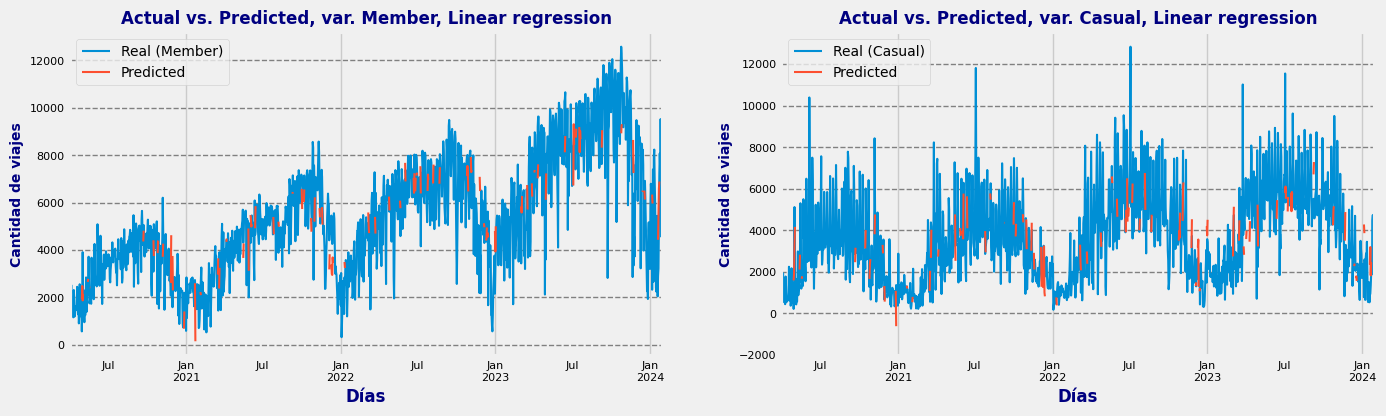

In [187]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

data['Member'].plot(ax=axes[0], label='Real (Member)')
data_lr['Predicted'].plot(ax=axes[0], label='Predicted')

data['Casual'].plot(ax=axes[1], label='Real (Casual)')
data_lr_c['Predicted'].plot(ax=axes[1], label='Predicted')

axes[0].set_title('Actual vs. Predicted, var. Member, Linear regression', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_title('Actual vs. Predicted, var. Casual, Linear regression', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

axes[0].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[1].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')


#predicciones.plot(ax=ax, label='predicciones')
ax.legend();

### Modelo Random Forest

Generamos el modelo "Random Forest" para prediccion de las 2 variables "Member" y "Casual" y lo entrenamos. Se inicia el modelo con  500 desicion trees.

In [188]:
modelo_rf = RandomForestRegressor(
            n_estimators = 500,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )

modelo_rf_c = RandomForestRegressor(
            n_estimators = 500,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )


modelo_rf.fit(X_trainn, y_train)
modelo_rf_c.fit(X_trainn_c, y_train_c)

RandomForestRegressor(max_features=5, n_estimators=500, n_jobs=-1,
                      random_state=42)

Se generan las predicciones sobre el conjunto de datos X_test y X_test_c.

In [189]:
pred_rf = modelo_rf.predict(X=X_testn).round()
pred_rf_c = modelo_rf_c.predict(X=X_testn_c).round()

Revisemos los hiperparametros utilizados en los modelos actuales.

In [190]:
print('Parametros actuales del modelo para la variable "Member":\n')
pprint(modelo_rf.get_params())

Parametros actuales del modelo para la variable "Member":

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [191]:
print('Parametros actuales del modelo para la variable "Casual":\n')
pprint(modelo_rf_c.get_params())

Parametros actuales del modelo para la variable "Casual":

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Se calculan los coeficientes de determinacion R2, RMSE, MAE, errores y accuracy de los modelos.

In [192]:
mse = mean_squared_error(y_true=y_test, y_pred=pred_rf)
rmse=sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=pred_rf)
errors = abs(pred_rf - y_test)

mse_c = mean_squared_error(y_true=y_test_c, y_pred=pred_rf_c)
rmse_c=sqrt(mse_c)
r2_c = r2_score(y_true=y_test_c, y_pred=pred_rf_c)
errors_c = abs(pred_rf_c - y_test_c)

print(f'R-squared Member: {r2}')
print(f"El error (rmse) de test es Member: {rmse, mse}")
print(f'Errores Member: {errors}')
print(f'______________________')
print(f'R-squared Casual: {r2_c}')
print(f"El error (rmse) de test es Casual: {rmse_c, mse_c}")
print(f'Errores Casual: {errors_c}')

R-squared Member: 0.8139737885406038
El error (rmse) de test es Member: (1039.758027132157, 1081096.754985755)
Errores Member: Date_started
2023-03-29    1273.0
2022-11-05    1186.0
2020-05-20     427.0
2023-09-10     140.0
2022-03-08      58.0
               ...  
2020-10-17     688.0
2021-05-28     927.0
2023-03-18     862.0
2021-04-16     353.0
2023-12-15    1630.0
Name: Member, Length: 351, dtype: float64
______________________
R-squared Casual: 0.703376810169359
El error (rmse) de test es Casual: (1105.5646531430002, 1222273.2022792022)
Errores Casual: Date_started
2023-03-29     930.0
2022-11-05     989.0
2020-05-20     610.0
2023-09-10    1785.0
2022-03-08     246.0
               ...  
2020-10-17    1512.0
2021-05-28     857.0
2023-03-18    1642.0
2021-04-16     567.0
2023-12-15     997.0
Name: Casual, Length: 351, dtype: float64


In [193]:
mape = 100 * (errors / y_test)
mape_c = 100 * (errors_c / y_test_c)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
accuracy_c = 100 - np.mean(mape_c)

print('MAE Member:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy Member:', round(accuracy, 2), '%.')
print('MAPE Member:', mape)
print('_____________________________________________')
print('MAE Casual:', round(np.mean(errors_c), 2), 'degrees.')
print('Accuracy Casual:', round(accuracy_c, 2), '%.')
print('MAPE Casual:', mape_c)

MAE Member: 796.78 degrees.
Accuracy Member: 78.6 %.
MAPE Member: Date_started
2023-03-29    15.293128
2022-11-05    16.042202
2020-05-20    21.554770
2023-09-10     1.744983
2022-03-08     1.123160
                ...    
2020-10-17    13.514044
2021-05-28    24.254317
2023-03-18    14.450964
2021-04-16     8.979903
2023-12-15    19.803183
Name: Member, Length: 351, dtype: float64
_____________________________________________
MAE Casual: 749.93 degrees.
Accuracy Casual: 65.85 %.
MAPE Casual: Date_started
2023-03-29    20.988490
2022-11-05    12.614796
2020-05-20    42.479109
2023-09-10    34.479428
2022-03-08    10.106820
                ...    
2020-10-17    25.145518
2021-05-28    28.787370
2023-03-18    27.171934
2021-04-16    23.209169
2023-12-15    28.068694
Name: Casual, Length: 351, dtype: float64


Definimos las variables más importantes para el modelo

In [194]:
features = pd.get_dummies(X_train)
features_c = pd.get_dummies(X_train_c)

In [195]:
feature_list = list(features.columns)
feature_list_c = list(features_c.columns)

Calculamos la importancia de cada variable para la variable "Member", creamos una tupla, las sorteamos e imprimimos.

In [196]:
importances = list(modelo_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Year                 Importance: 0.42
Variable: Temporada            Importance: 0.11
Variable: Temperatura mínima diaria Importance: 0.1
Variable: Month                Importance: 0.08
Variable: Temperatura máxima diaria Importance: 0.07
Variable: Day                  Importance: 0.04
Variable: Presión              Importance: 0.04
Variable: Velocidad del viento máxima constante Importance: 0.04
Variable: Dia_semana           Importance: 0.03
Variable: Descripción          Importance: 0.03
Variable: Dia_laboral          Importance: 0.02
Variable: Precipitaciones totales diarias Importance: 0.02
Variable: Feriado_WDC          Importance: 0.0


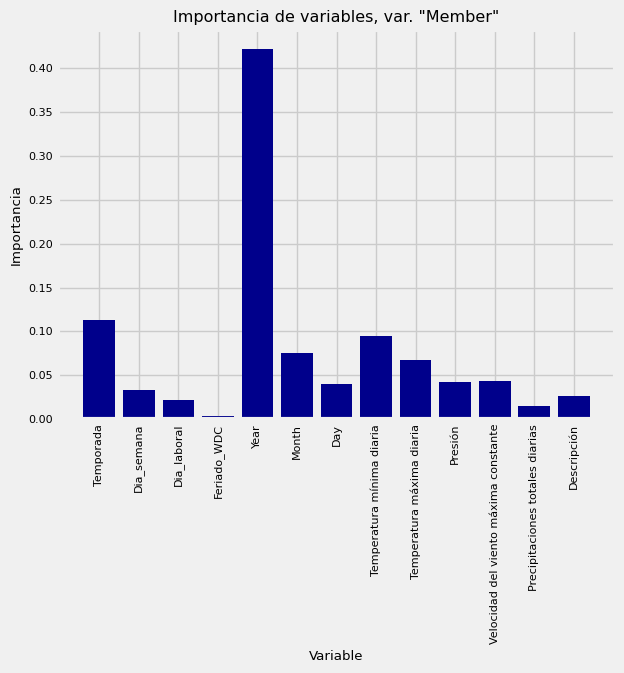

In [197]:
%matplotlib inline

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical', color="darkblue")
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancia de variables, var. "Member"');

Calculamos la importancia de cada variable para la variable "Casual", creamos una tupla, las sorteamos e imprimimos.

In [198]:
importances_c = list(modelo_rf_c.feature_importances_)
feature_importances_c = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_c, importances_c)]
feature_importances_c = sorted(feature_importances_c, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_c];

Variable: Temperatura mínima diaria Importance: 0.22
Variable: Year                 Importance: 0.14
Variable: Temperatura máxima diaria Importance: 0.14
Variable: Dia_semana           Importance: 0.11
Variable: Temporada            Importance: 0.09
Variable: Dia_laboral          Importance: 0.08
Variable: Month                Importance: 0.06
Variable: Velocidad del viento máxima constante Importance: 0.05
Variable: Day                  Importance: 0.04
Variable: Presión              Importance: 0.04
Variable: Descripción          Importance: 0.02


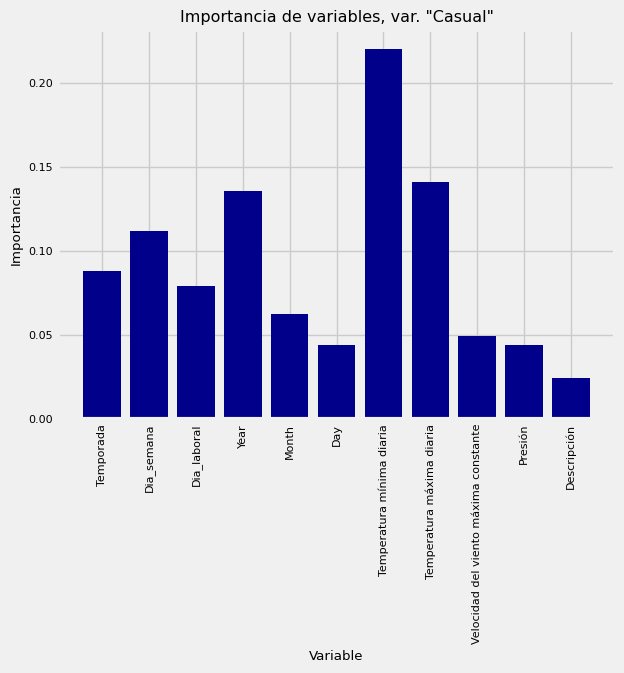

In [199]:
%matplotlib inline

x_values_c = list(range(len(importances_c)))

plt.bar(x_values_c, importances_c, orientation = 'vertical', color="darkblue")
plt.xticks(x_values_c, feature_list_c, rotation='vertical')
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancia de variables, var. "Casual"');

Procedemos a comprarar los valores reales vs. predichos y graficamos los puntos predichos sobre los datos reales.

In [200]:
comparaciones_rf = pd.DataFrame(y_test)
comparaciones_rf = comparaciones_rf.assign(Predicted = pred_rf.flatten().tolist())
print(comparaciones_rf)

              Member  Predicted
Date_started                   
2023-03-29      8324     7051.0
2022-11-05      7393     6207.0
2020-05-20      1981     2408.0
2023-09-10      8023     7883.0
2022-03-08      5164     5106.0
...              ...        ...
2020-10-17      5091     4403.0
2021-05-28      3822     4749.0
2023-03-18      5965     5103.0
2021-04-16      3931     3578.0
2023-12-15      8231     6601.0

[351 rows x 2 columns]


In [201]:
comparaciones_rf_c = pd.DataFrame(y_test_c)
comparaciones_rf_c = comparaciones_rf_c.assign(Predicted = pred_rf_c.flatten().tolist())
print(comparaciones_rf_c)

              Casual  Predicted
Date_started                   
2023-03-29      4431     3501.0
2022-11-05      7840     6851.0
2020-05-20      1436     2046.0
2023-09-10      5177     6962.0
2022-03-08      2434     2680.0
...              ...        ...
2020-10-17      6013     4501.0
2021-05-28      2977     3834.0
2023-03-18      6043     4401.0
2021-04-16      2443     3010.0
2023-12-15      3552     2555.0

[351 rows x 2 columns]


In [202]:
comparaciones_rf.to_csv('prediccion_rf.csv')
comparaciones_rf_c.to_csv('prediccion_rf_c.csv')

In [203]:
pd.read_csv('prediccion_rf.csv')
pd.read_csv('prediccion_rf_c.csv')

Date_started  Casual  Predicted
0     2023-03-29    4431     3501.0
1     2022-11-05    7840     6851.0
2     2020-05-20    1436     2046.0
3     2023-09-10    5177     6962.0
4     2022-03-08    2434     2680.0
..           ...     ...        ...
346   2020-10-17    6013     4501.0
347   2021-05-28    2977     3834.0
348   2023-03-18    6043     4401.0
349   2021-04-16    2443     3010.0
350   2023-12-15    3552     2555.0

[351 rows x 3 columns]

In [204]:
data_rf=pd.merge(left=data,right=comparaciones_rf, how='left', left_on='Date_started', right_on='Date_started')
data_rf.head(5)

Casual  Member_x  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01       410      1355                 1765          2           3   
2020-04-02       520      1565                 2085          2           4   
2020-04-03       679      1814                 2493          2           5   
2020-04-04      1195      1965                 3160          2           6   
2020-04-05      1929      2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Member_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

In [205]:
data_rf_c=pd.merge(left=data,right=comparaciones_rf_c, how='left', left_on='Date_started', right_on='Date_started')
data_rf_c.head(5)

Casual_x  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01         410    1355                 1765          2           3   
2020-04-02         520    1565                 2085          2           4   
2020-04-03         679    1814                 2493          2           5   
2020-04-04        1195    1965                 3160          2           6   
2020-04-05        1929    2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Casual_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

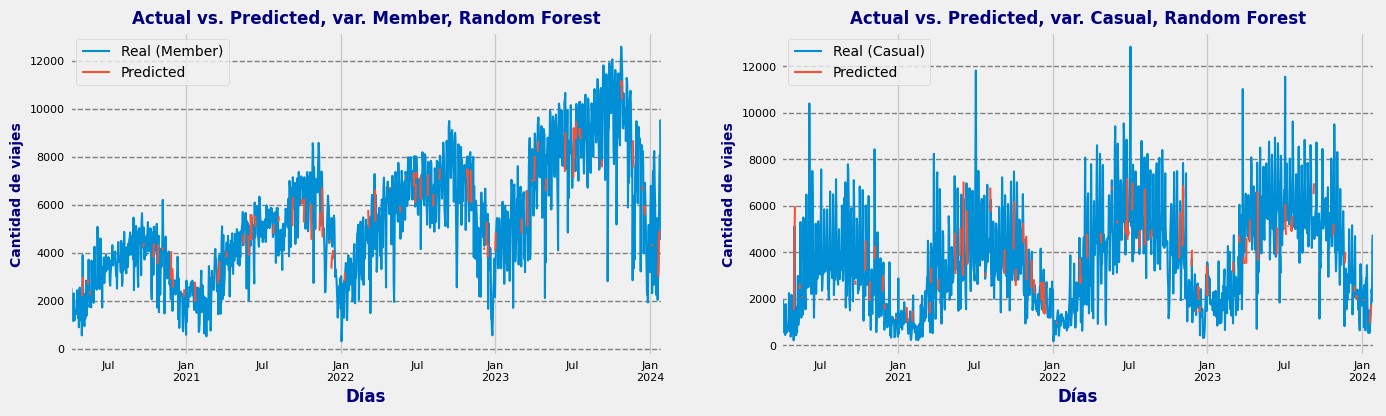

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['Member'].plot(ax=axes[0], label='Real (Member)')
data_rf['Predicted'].plot(ax=axes[0], label='Predicted')

data['Casual'].plot(ax=axes[1], label='Real (Casual)')
data_rf_c['Predicted'].plot(ax=axes[1], label='Predicted')

axes[0].set_title('Actual vs. Predicted, var. Member, Random Forest', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_title('Actual vs. Predicted, var. Casual, Random Forest', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

axes[0].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[1].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

ax.legend();

Procedemos con el calculo de los mejores hiperparametros para cada modelo, utilizando la funcion radom grid to search.
Primero, definiremos los hiperparametros importantes y crearemos el modelo base. Posteriormente, aplicaremos la funcion para definir los mejores hiperparametros, utilizando 3 fold cross validation y buscando entre 100 diferentes combinaciones.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_state = [int(x) for x in np.linspace(10, 200, num = 20)]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state':random_state}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'random_state': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190,
                  200]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = modelo_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
rf_random_c = RandomizedSearchCV(estimator = modelo_rf_c, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
rf_random.fit(X_trainn, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=5,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'random_state': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   verbose=2)

In [ ]:
rf_random_c.fit(X_trainn_c, y_train_c)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=5,
                                                   n_estimators=500, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'random_state': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   verbose=2)

In [ ]:
print("Mejores hiperparámetros encontrados:")
rf_random.best_params_

Mejores hiperparámetros encontrados:


{'random_state': 90,
 'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
print("Mejor puntuación de validación cruzada:")
print(rf_random.best_score_)

Mejor puntuación de validación cruzada:
0.8024672924229957


In [ ]:
print("Mejores hiperparámetros encontrados:")
rf_random_c.best_params_

Mejores hiperparámetros encontrados:


{'random_state': 70,
 'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
print("Mejor puntuación de validación cruzada:")
print(rf_random_c.best_score_)

Mejor puntuación de validación cruzada:
0.7439115624146627


Generamos los modelos con los hiperparametros calculados y los entrenamos.

In [208]:
modelo_rf_best = RandomForestRegressor(
            n_estimators = 800,
            min_samples_split = 2,
            min_samples_leaf = 2,
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            bootstrap = True,
            n_jobs       = -1,
            random_state = 90
         )


modelo_rf_best.fit(X_trainn, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_leaf=2, n_estimators=800,
                      n_jobs=-1, random_state=90)

In [209]:
modelo_rf_c_best = RandomForestRegressor(
            n_estimators = 900,
            min_samples_split = 2,
            min_samples_leaf = 1,
            max_depth    = 80,
            max_features = 'sqrt',
            oob_score    = False,
            bootstrap = True,
            n_jobs       = -1,
            random_state = 70
         )


modelo_rf_c_best.fit(X_trainn_c, y_train_c)

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=900,
                      n_jobs=-1, random_state=70)

Se generan las predicciones sobre el conjunto de datos X_test y X_test_c.

In [210]:
pred_rf_best = modelo_rf_best.predict(X=X_testn).round()
pred_rf_c_best = modelo_rf_c_best.predict(X=X_testn_c).round()

Se calculan los coeficientes de determinacion R2, RMSE, MAE, errores y accuracy de los modelos.

In [211]:
mse = mean_squared_error(y_true=y_test, y_pred=pred_rf_best)
rmse=sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=pred_rf_best)
errors = abs(pred_rf_best - y_test)

mse_c = mean_squared_error(y_true=y_test_c, y_pred=pred_rf_c_best)
rmse_c=sqrt(mse_c)
r2_c = r2_score(y_true=y_test_c, y_pred=pred_rf_c_best)
errors_c = abs(pred_rf_c_best - y_test_c)


# Print out the mean absolute error (mae)
print('Mean Absolute Error Member:', round(np.mean(errors), 2), 'degrees.')
print(f'R-squared Member: {r2}')
print(f"El error (rmse) de test Member es: {rmse, mse}")
print(f'Errores Member: {errors}')
print(f'___________________')
print('Mean Absolute Error Casual:', round(np.mean(errors_c), 2), 'degrees.')
print(f'R-squared Casual: {r2_c}')
print(f"El error (rmse) de test Casual es: {rmse_c, mse_c}")
print(f'Errores Casual: {errors_c}')

Mean Absolute Error Member: 779.19 degrees.
R-squared Member: 0.8118134752613817
El error (rmse) de test Member es: (1045.7779298840069, 1093651.4786324787)
Errores Member: Date_started
2023-03-29     665.0
2022-11-05    1586.0
2020-05-20      44.0
2023-09-10      16.0
2022-03-08     293.0
               ...  
2020-10-17     734.0
2021-05-28     562.0
2023-03-18     544.0
2021-04-16     141.0
2023-12-15    1543.0
Name: Member, Length: 351, dtype: float64
___________________
Mean Absolute Error Casual: 750.59 degrees.
R-squared Casual: 0.7041400036318515
El error (rmse) de test Casual es: (1104.1414617345765, 1219128.3675213675)
Errores Casual: Date_started
2023-03-29     912.0
2022-11-05    1232.0
2020-05-20     682.0
2023-09-10    1852.0
2022-03-08     299.0
               ...  
2020-10-17    1442.0
2021-05-28     905.0
2023-03-18    1638.0
2021-04-16     723.0
2023-12-15     978.0
Name: Casual, Length: 351, dtype: float64


In [212]:
mape = 100 * (errors / y_test)
mape_c = 100 * (errors_c / y_test_c)

accuracy = 100 - np.mean(mape)
accuracy_c = 100 - np.mean(mape_c)

print('MAE Member:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy Member:', round(accuracy, 2), '%.')
print('MAPE Member:', mape)
print('_____________________________________________')
print('MAE Casual:', round(np.mean(errors_c), 2), 'degrees.')
print('Accuracy Casual:', round(accuracy_c, 2), '%.')
print('MAPE Casual:', mape_c)

MAE Member: 779.19 degrees.
Accuracy Member: 79.43 %.
MAPE Member: Date_started
2023-03-29     7.988948
2022-11-05    21.452726
2020-05-20     2.221100
2023-09-10     0.199427
2022-03-08     5.673896
                ...    
2020-10-17    14.417600
2021-05-28    14.704343
2023-03-18     9.119866
2021-04-16     3.586874
2023-12-15    18.746203
Name: Member, Length: 351, dtype: float64
_____________________________________________
MAE Casual: 750.59 degrees.
Accuracy Casual: 64.97 %.
MAPE Casual: Date_started
2023-03-29    20.582261
2022-11-05    15.714286
2020-05-20    47.493036
2023-09-10    35.773614
2022-03-08    12.284306
                ...    
2020-10-17    23.981374
2021-05-28    30.399731
2023-03-18    27.105742
2021-04-16    29.594761
2023-12-15    27.533784
Name: Casual, Length: 351, dtype: float64


Procedemos a comprarar los valores reales vs. predichos con hiperparametros ajustados y graficamos los puntos predichos sobre los datos reales.

In [213]:
comparaciones_rf_aj = pd.DataFrame(y_test)
comparaciones_rf_aj = comparaciones_rf_aj.assign(Predicted = pred_rf_best.flatten().tolist())
print(comparaciones_rf_aj)

              Member  Predicted
Date_started                   
2023-03-29      8324     7659.0
2022-11-05      7393     5807.0
2020-05-20      1981     1937.0
2023-09-10      8023     8039.0
2022-03-08      5164     5457.0
...              ...        ...
2020-10-17      5091     4357.0
2021-05-28      3822     4384.0
2023-03-18      5965     5421.0
2021-04-16      3931     3790.0
2023-12-15      8231     6688.0

[351 rows x 2 columns]


In [214]:
comparaciones_rf_c_aj = pd.DataFrame(y_test_c)
comparaciones_rf_c_aj = comparaciones_rf_c_aj.assign(Predicted = pred_rf_c_best.flatten().tolist())
print(comparaciones_rf_c_aj)

              Casual  Predicted
Date_started                   
2023-03-29      4431     3519.0
2022-11-05      7840     6608.0
2020-05-20      1436     2118.0
2023-09-10      5177     7029.0
2022-03-08      2434     2733.0
...              ...        ...
2020-10-17      6013     4571.0
2021-05-28      2977     3882.0
2023-03-18      6043     4405.0
2021-04-16      2443     3166.0
2023-12-15      3552     2574.0

[351 rows x 2 columns]


In [215]:
comparaciones_rf_aj.to_csv('prediccion_rf_aj.csv')
comparaciones_rf_c_aj.to_csv('prediccion_rf_c_aj.csv')

In [216]:
pd.read_csv('prediccion_rf_aj.csv')
pd.read_csv('prediccion_rf_c_aj.csv')

Date_started  Casual  Predicted
0     2023-03-29    4431     3519.0
1     2022-11-05    7840     6608.0
2     2020-05-20    1436     2118.0
3     2023-09-10    5177     7029.0
4     2022-03-08    2434     2733.0
..           ...     ...        ...
346   2020-10-17    6013     4571.0
347   2021-05-28    2977     3882.0
348   2023-03-18    6043     4405.0
349   2021-04-16    2443     3166.0
350   2023-12-15    3552     2574.0

[351 rows x 3 columns]

In [217]:
data_rf_aj=pd.merge(left=data,right=comparaciones_rf_aj, how='left', left_on='Date_started', right_on='Date_started')
data_rf_aj.head(5)

Casual  Member_x  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01       410      1355                 1765          2           3   
2020-04-02       520      1565                 2085          2           4   
2020-04-03       679      1814                 2493          2           5   
2020-04-04      1195      1965                 3160          2           6   
2020-04-05      1929      2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Member_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

In [218]:
data_rf_c_aj=pd.merge(left=data,right=comparaciones_rf_c_aj, how='left', left_on='Date_started', right_on='Date_started')
data_rf_c_aj.head(5)

Casual_x  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01         410    1355                 1765          2           3   
2020-04-02         520    1565                 2085          2           4   
2020-04-03         679    1814                 2493          2           5   
2020-04-04        1195    1965                 3160          2           6   
2020-04-05        1929    2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Casual_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

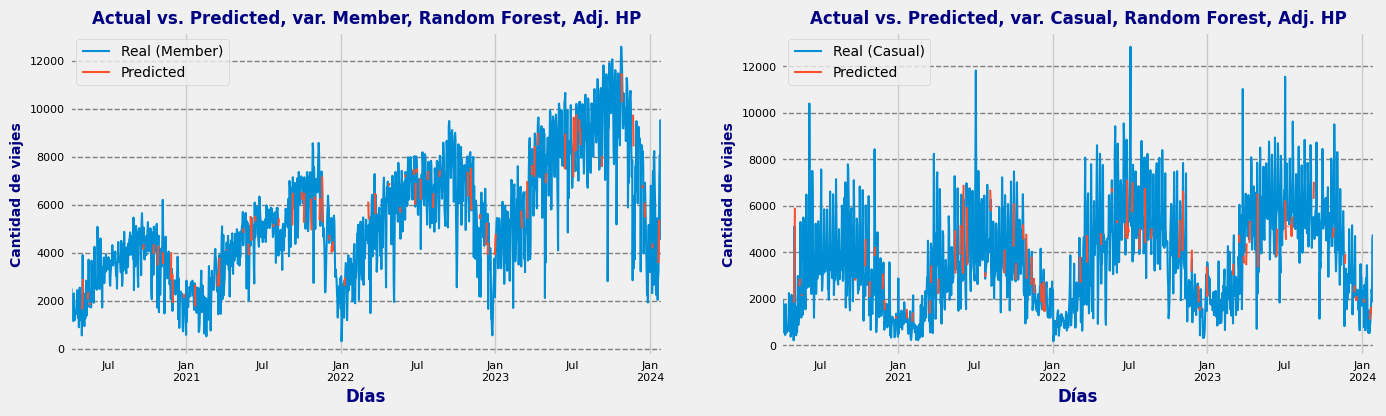

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['Member'].plot(ax=axes[0], label='Real (Member)')
data_rf_aj['Predicted'].plot(ax=axes[0], label='Predicted')

data['Casual'].plot(ax=axes[1], label='Real (Casual)')
data_rf_c_aj['Predicted'].plot(ax=axes[1], label='Predicted')

axes[0].set_title('Actual vs. Predicted, var. Member, Random Forest, Adj. HP', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_title('Actual vs. Predicted, var. Casual, Random Forest, Adj. HP', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

axes[0].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[1].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

ax.legend();

Vamos a visualizar el arbol del modelo.

In [ ]:
# Pull out one tree from the forest
tree = modelo_rf_best.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Generamos la matriz de confusion.

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, pred_rf_best)
print(confusion_mat)

ConfusionMatrixDisplay(confusion_matrix=confusion_mat).plot();

### Modelo "KNN K-Nearest-Neighbor".

Se procede a generar y ejecutar el modelo de ML KNN para predecir las variables "Member" y "Casual" sobre el conjunto de datos X_test y X_test_c.

In [220]:
knn_model = KNeighborsRegressor(n_neighbors=13, weights = 'uniform', algorithm='auto', n_jobs=-1)
knn_model.fit(X_trainn.round(), y_train.round())

KNeighborsRegressor(n_jobs=-1, n_neighbors=13)

In [221]:
knn_model_c = KNeighborsRegressor(n_neighbors=13, weights = 'uniform', algorithm='auto', n_jobs=-1)
knn_model_c.fit(X_trainn_c, y_train_c)

KNeighborsRegressor(n_jobs=-1, n_neighbors=13)

Se generan las predicciones sobre el conjunto de datos X_test y X_test_c.

In [222]:
knn_pred=knn_model.predict(X_testn).round()
knn_pred_c=knn_model_c.predict(X_testn_c).round()

Revisemos los parametros utilizados en los modelos actuales.

In [223]:
print('Parametros actuales del modelo para la variable "Member":\n')
pprint(knn_model.get_params())

Parametros actuales del modelo para la variable "Member":

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}


In [224]:
print('Parametros actuales del modelo para la variable "Casual":\n')
pprint(knn_model_c.get_params())

Parametros actuales del modelo para la variable "Casual":

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}


Se calculan los coeficientes de determinacion R2, RMSE, MAE, errores y accuracy de los modelos.

In [225]:
mse = mean_squared_error(y_true=y_test, y_pred=knn_pred)
rmse=sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=knn_pred)
errors = abs(knn_pred - y_test)

mse_c = mean_squared_error(y_true=y_test_c, y_pred=knn_pred_c)
rmse_c=sqrt(mse_c)
r2_c = r2_score(y_true=y_test_c, y_pred=knn_pred_c)
errors_c = abs(knn_pred_c - y_test_c)

print(f'R-squared Member: {r2}')
print(f"El error (rmse) de test Member es: {rmse, mse}")
print(f'Errores Member: {errors}')
print(f'___________________________')
print(f'R-squared Casual: {r2_c}')
print(f"El error (rmse) de test Casual es: {rmse_c, mse_c}")
print(f'Errores Casual: {errors_c}')

R-squared Member: 0.5947203004084513
El error (rmse) de test Member es: (1534.696972604298, 2355294.797720798)
Errores Member: Date_started
2023-03-29    1580.0
2022-11-05     973.0
2020-05-20    2664.0
2023-09-10     179.0
2022-03-08     617.0
               ...  
2020-10-17     652.0
2021-05-28    1378.0
2023-03-18     124.0
2021-04-16    1064.0
2023-12-15    2184.0
Name: Member, Length: 351, dtype: float64
___________________________
R-squared Casual: 0.6946522532475217
El error (rmse) de test Casual es: (1121.705771406583, 1258223.8376068375)
Errores Casual: Date_started
2023-03-29     119.0
2022-11-05    1490.0
2020-05-20     429.0
2023-09-10    1441.0
2022-03-08     692.0
               ...  
2020-10-17    1703.0
2021-05-28     750.0
2023-03-18     890.0
2021-04-16    1696.0
2023-12-15    1272.0
Name: Casual, Length: 351, dtype: float64


In [226]:
mape = 100 * (errors / y_test)
mape_c = 100 * (errors_c / y_test_c)

accuracy = 100 - np.mean(mape)
accuracy_c = 100 - np.mean(mape_c)

print('MAE Member:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy Member:', round(accuracy, 2), '%.')
print('MAPE Member:', mape)
print('_____________________________________________')
print('MAE Casual:', round(np.mean(errors_c), 2), 'degrees.')
print('Accuracy Casual:', round(accuracy_c, 2), '%.')
print('MAPE Casual:', mape_c)

MAE Member: 1223.69 degrees.
Accuracy Member: 63.11 %.
MAPE Member: Date_started
2023-03-29     18.981259
2022-11-05     13.161098
2020-05-20    134.477537
2023-09-10      2.231086
2022-03-08     11.948102
                 ...    
2020-10-17     12.806914
2021-05-28     36.054422
2023-03-18      2.078793
2021-04-16     27.066904
2023-12-15     26.533835
Name: Member, Length: 351, dtype: float64
_____________________________________________
MAE Casual: 799.5 degrees.
Accuracy Casual: 58.74 %.
MAPE Casual: Date_started
2023-03-29     2.685624
2022-11-05    19.005102
2020-05-20    29.874652
2023-09-10    27.834653
2022-03-08    28.430567
                ...    
2020-10-17    28.321969
2021-05-28    25.193147
2023-03-18    14.727784
2021-04-16    69.422841
2023-12-15    35.810811
Name: Casual, Length: 351, dtype: float64


Procedemos a comprarar los valores reales vs. predichos y graficamos los puntos predichos sobre los datos reales.

In [227]:
comparaciones_knn = pd.DataFrame(y_test)
comparaciones_knn = comparaciones_knn.assign(Predicted = knn_pred.flatten().tolist())
print(comparaciones_knn)

              Member  Predicted
Date_started                   
2023-03-29      8324     6744.0
2022-11-05      7393     6420.0
2020-05-20      1981     4645.0
2023-09-10      8023     7844.0
2022-03-08      5164     4547.0
...              ...        ...
2020-10-17      5091     4439.0
2021-05-28      3822     5200.0
2023-03-18      5965     6089.0
2021-04-16      3931     2867.0
2023-12-15      8231     6047.0

[351 rows x 2 columns]


In [228]:
comparaciones_knn_c = pd.DataFrame(y_test_c)
comparaciones_knn_c = comparaciones_knn_c.assign(Predicted = knn_pred_c.flatten().tolist())
print(comparaciones_knn_c)

              Casual  Predicted
Date_started                   
2023-03-29      4431     4312.0
2022-11-05      7840     6350.0
2020-05-20      1436     1865.0
2023-09-10      5177     6618.0
2022-03-08      2434     3126.0
...              ...        ...
2020-10-17      6013     4310.0
2021-05-28      2977     3727.0
2023-03-18      6043     5153.0
2021-04-16      2443     4139.0
2023-12-15      3552     2280.0

[351 rows x 2 columns]


In [229]:
comparaciones_knn.to_csv('prediccion_knn.csv')
comparaciones_knn_c.to_csv('prediccion_knn_c.csv')

In [230]:
pd.read_csv('prediccion_knn.csv')
pd.read_csv('prediccion_knn_c.csv')

Date_started  Casual  Predicted
0     2023-03-29    4431     4312.0
1     2022-11-05    7840     6350.0
2     2020-05-20    1436     1865.0
3     2023-09-10    5177     6618.0
4     2022-03-08    2434     3126.0
..           ...     ...        ...
346   2020-10-17    6013     4310.0
347   2021-05-28    2977     3727.0
348   2023-03-18    6043     5153.0
349   2021-04-16    2443     4139.0
350   2023-12-15    3552     2280.0

[351 rows x 3 columns]

In [231]:
data_knn=pd.merge(left=data,right=comparaciones_knn, how='left', left_on='Date_started', right_on='Date_started')
data_knn.head(5)

Casual  Member_x  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01       410      1355                 1765          2           3   
2020-04-02       520      1565                 2085          2           4   
2020-04-03       679      1814                 2493          2           5   
2020-04-04      1195      1965                 3160          2           6   
2020-04-05      1929      2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Member_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

In [232]:
data_knn_c=pd.merge(left=data,right=comparaciones_knn_c, how='left', left_on='Date_started', right_on='Date_started')
data_knn_c.head(5)

Casual_x  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01         410    1355                 1765          2           3   
2020-04-02         520    1565                 2085          2           4   
2020-04-03         679    1814                 2493          2           5   
2020-04-04        1195    1965                 3160          2           6   
2020-04-05        1929    2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Casual_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

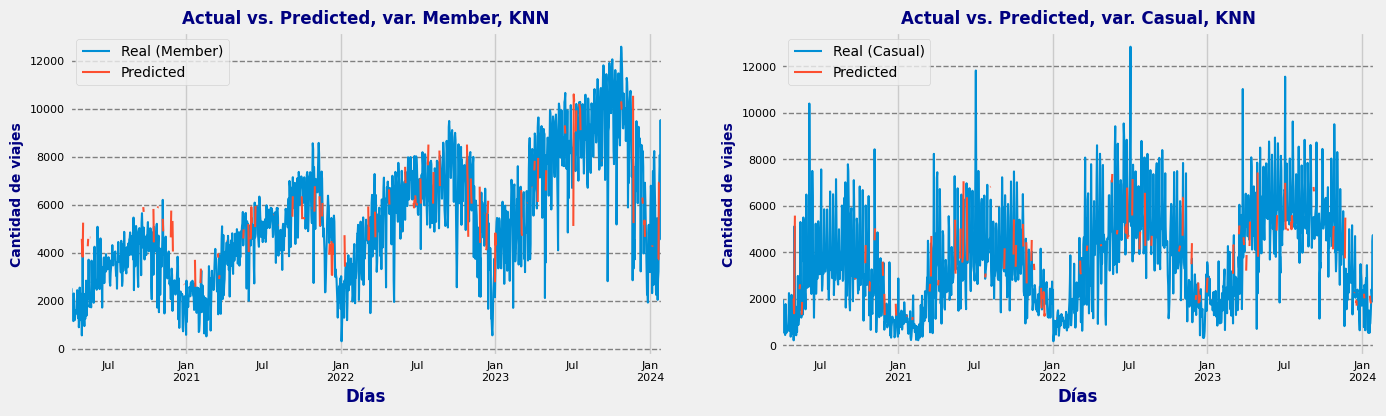

In [233]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['Member'].plot(ax=axes[0], label='Real (Member)')
data_knn['Predicted'].plot(ax=axes[0], label='Predicted')

data['Casual'].plot(ax=axes[1], label='Real (Casual)')
data_knn_c['Predicted'].plot(ax=axes[1], label='Predicted')

axes[0].set_title('Actual vs. Predicted, var. Member, KNN', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_title('Actual vs. Predicted, var. Casual, KNN', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

axes[0].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[1].set_xlabel("Días", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')


Se procede con la ejecución de la validación cruzada con el objetivo de determinar los valores de coeficientes n_neighbors y weights óptimos para el modelo.

Member: Min Value uniform : 925.0284900284901 (4)
Member: Min Value distance : 900.3828077014338 (4)


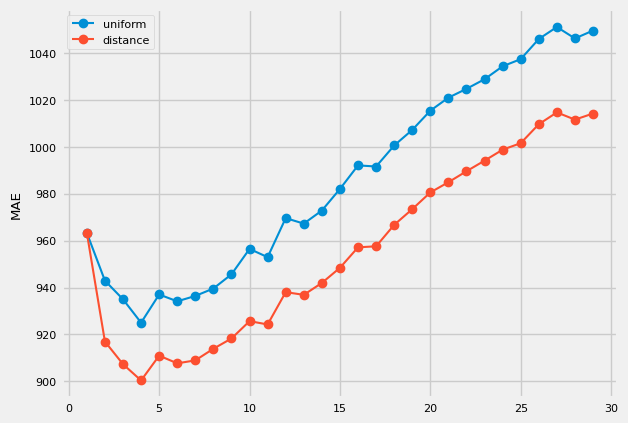

In [ ]:
# Para prediccion de la variable "Member".
cv = KFold(n_splits = 10, shuffle = False) #

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       knn.fit( X = X_trainn, y = y_train)
       y_pred = knn.predict(X = X_testn)
       # evaluación del modelo
       mae = mean_absolute_error(y_test, y_pred)
       fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Member: Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')

plt.legend()
plt.show()


Causal: Min Value uniform : 795.7217473884142 (6)
Causal: Min Value distance : 788.1669899849109 (19)


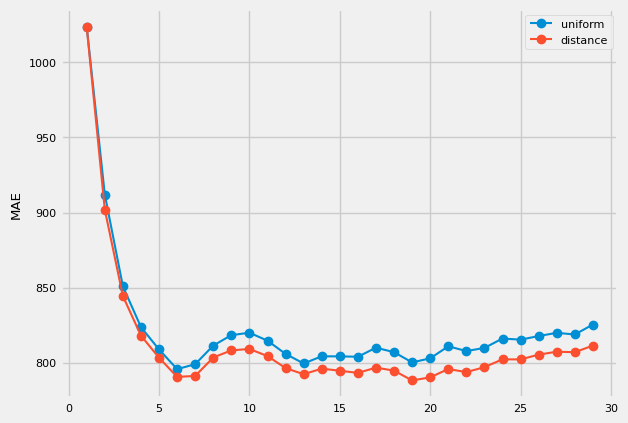

In [ ]:
# Para prediccion de la variable "Casual".
cv = KFold(n_splits = 10, shuffle = False) #

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       knn.fit( X = X_trainn_c, y = y_train_c)
       y_pred = knn.predict(X = X_testn_c)
       # evaluación del modelo
       mae = mean_absolute_error(y_test_c, y_pred)
       fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Causal: Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')

plt.legend()
plt.show()


Se procede con la generacion de los modelos con los valores n-neighbors y weight calculados.

In [234]:
knn_model_aj = KNeighborsRegressor(n_neighbors=4, weights = 'uniform',algorithm='auto', n_jobs=-1)
knn_model_aj.fit(X_trainn.round(), y_train.round())

KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

In [235]:
knn_model_aj_c = KNeighborsRegressor(n_neighbors=6, weights = 'uniform',algorithm='auto', n_jobs=-1)
knn_model_aj_c.fit(X_trainn_c, y_train_c)

KNeighborsRegressor(n_jobs=-1, n_neighbors=6)

Se generan las predicciones sobre el conjunto de datos X_test y X_test_c.

In [236]:
knn_pred_aj=knn_model_aj.predict(X_testn).round()
knn_pred_aj_c=knn_model_aj_c.predict(X_testn_c).round()

Revisemos los parametros utilizados en los modelos actuales.

In [237]:
print('Parametros actuales del modelo para la variable "Member":\n')
pprint(knn_model_aj.get_params())

Parametros actuales del modelo para la variable "Member":

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}


In [238]:
print('Parametros actuales del modelo para la variable "Casual":\n')
pprint(knn_model_aj_c.get_params())

Parametros actuales del modelo para la variable "Casual":

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}


Se calculan los coeficientes de determinacion R2, RMSE, MAE, errores y accuracy de los modelos.

In [239]:
mse = mean_squared_error(y_true=y_test, y_pred=knn_pred_aj)
rmse=sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=knn_pred_aj)
errors = abs(knn_pred_aj - y_test)

mse_c = mean_squared_error(y_true=y_test_c, y_pred=knn_pred_aj_c)
rmse_c=sqrt(mse_c)
r2_c = r2_score(y_true=y_test_c, y_pred=knn_pred_aj_c)
errors_c = abs(knn_pred_aj_c - y_test_c)

print(f'R-squared Member: {r2}')
print(f"El error (rmse) de test Member es: {rmse, mse}")
print(f'Errores Member: {errors}')
print(f'___________________________')
print(f'R-squared Casual: {r2_c}')
print(f"El error (rmse) de test Casual es: {rmse_c, mse_c}")
print(f'Errores Casual: {errors_c}')

R-squared Member: 0.52579527616864
El error (rmse) de test Member es: (1660.0766810284958, 2755854.5868945867)
Errores Member: Date_started
2023-03-29    1430.0
2022-11-05     207.0
2020-05-20    2481.0
2023-09-10     942.0
2022-03-08    2762.0
               ...  
2020-10-17     191.0
2021-05-28    1467.0
2023-03-18     339.0
2021-04-16     959.0
2023-12-15     161.0
Name: Member, Length: 351, dtype: float64
___________________________
R-squared Casual: 0.6826652877675029
El error (rmse) de test Casual es: (1143.511101029036, 1307617.6381766382)
Errores Casual: Date_started
2023-03-29     108.0
2022-11-05    1341.0
2020-05-20     275.0
2023-09-10    1404.0
2022-03-08     491.0
               ...  
2020-10-17    1224.0
2021-05-28     517.0
2023-03-18     175.0
2021-04-16    1874.0
2023-12-15    1168.0
Name: Casual, Length: 351, dtype: float64


In [240]:
mape = 100 * (errors / y_test)
mape_c = 100 * (errors_c / y_test_c)

accuracy = 100 - np.mean(mape)
accuracy_c = 100 - np.mean(mape_c)

print('MAE Member:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy Member:', round(accuracy, 2), '%.')
print('MAPE Member:', mape)
print('_____________________________________________')
print('MAE Casual:', round(np.mean(errors_c), 2), 'degrees.')
print('Accuracy Casual:', round(accuracy_c, 2), '%.')
print('MAPE Casual:', mape_c)

MAE Member: 1334.39 degrees.
Accuracy Member: 60.09 %.
MAPE Member: Date_started
2023-03-29     17.179241
2022-11-05      2.799946
2020-05-20    125.239778
2023-09-10     11.741244
2022-03-08     53.485670
                 ...    
2020-10-17      3.751719
2021-05-28     38.383046
2023-03-18      5.683152
2021-04-16     24.395828
2023-12-15      1.956020
Name: Member, Length: 351, dtype: float64
_____________________________________________
MAE Casual: 795.7 degrees.
Accuracy Casual: 60.3 %.
MAPE Casual: Date_started
2023-03-29     2.437373
2022-11-05    17.104592
2020-05-20    19.150418
2023-09-10    27.119954
2022-03-08    20.172555
                ...    
2020-10-17    20.355896
2021-05-28    17.366476
2023-03-18     2.895913
2021-04-16    76.708964
2023-12-15    32.882883
Name: Casual, Length: 351, dtype: float64


Procedemos a comprarar los valores reales vs. predichos y graficamos los puntos predichos sobre los datos reales.

In [241]:
comparaciones_knn_aj = pd.DataFrame(y_test)
comparaciones_knn_aj = comparaciones_knn_aj.assign(Predicted = knn_pred_aj.flatten().tolist())
print(comparaciones_knn_aj)

              Member  Predicted
Date_started                   
2023-03-29      8324     6894.0
2022-11-05      7393     7186.0
2020-05-20      1981     4462.0
2023-09-10      8023     8965.0
2022-03-08      5164     2402.0
...              ...        ...
2020-10-17      5091     4900.0
2021-05-28      3822     5289.0
2023-03-18      5965     6304.0
2021-04-16      3931     2972.0
2023-12-15      8231     8070.0

[351 rows x 2 columns]


In [242]:
comparaciones_knn_aj_c = pd.DataFrame(y_test_c)
comparaciones_knn_aj_c = comparaciones_knn_aj_c.assign(Predicted = knn_pred_aj_c.flatten().tolist())
print(comparaciones_knn_aj_c)

              Casual  Predicted
Date_started                   
2023-03-29      4431     4539.0
2022-11-05      7840     6499.0
2020-05-20      1436     1161.0
2023-09-10      5177     6581.0
2022-03-08      2434     2925.0
...              ...        ...
2020-10-17      6013     4789.0
2021-05-28      2977     3494.0
2023-03-18      6043     5868.0
2021-04-16      2443     4317.0
2023-12-15      3552     2384.0

[351 rows x 2 columns]


In [243]:
comparaciones_knn_aj.to_csv('prediccion_knn_aj.csv')
comparaciones_knn_aj_c.to_csv('prediccion_knn_aj_c.csv')

In [244]:
pd.read_csv('prediccion_knn_aj.csv')
pd.read_csv('prediccion_knn_aj_c.csv')

Date_started  Casual  Predicted
0     2023-03-29    4431     4539.0
1     2022-11-05    7840     6499.0
2     2020-05-20    1436     1161.0
3     2023-09-10    5177     6581.0
4     2022-03-08    2434     2925.0
..           ...     ...        ...
346   2020-10-17    6013     4789.0
347   2021-05-28    2977     3494.0
348   2023-03-18    6043     5868.0
349   2021-04-16    2443     4317.0
350   2023-12-15    3552     2384.0

[351 rows x 3 columns]

In [245]:
data_knn_aj=pd.merge(left=data,right=comparaciones_knn_aj, how='left', left_on='Date_started', right_on='Date_started')
data_knn_aj.head(5)

Casual  Member_x  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01       410      1355                 1765          2           3   
2020-04-02       520      1565                 2085          2           4   
2020-04-03       679      1814                 2493          2           5   
2020-04-04      1195      1965                 3160          2           6   
2020-04-05      1929      2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Member_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

In [246]:
data_knn_aj_c=pd.merge(left=data,right=comparaciones_knn_aj_c, how='left', left_on='Date_started', right_on='Date_started')
data_knn_aj_c.head(5)

Casual_x  Member  Member_Casual_count  Temporada  Dia_semana  \
Date_started                                                                 
2020-04-01         410    1355                 1765          2           3   
2020-04-02         520    1565                 2085          2           4   
2020-04-03         679    1814                 2493          2           5   
2020-04-04        1195    1965                 3160          2           6   
2020-04-05        1929    2523                 4452          2           7   

              Dia_laboral  Feriado_WDC  Year  Month  Day  \
Date_started                                               
2020-04-01              1            0  2020      4    1   
2020-04-02              1            0  2020      4    2   
2020-04-03              1            0  2020      4    3   
2020-04-04              0            0  2020      4    4   
2020-04-05              0            0  2020      4    5   

              Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                         
2020-04-01                          6.0                       14.0   
2020-04-02                          6.0                       17.0   
2020-04-03                          9.0                       19.0   
2020-04-04                         11.0                       14.0   
2020-04-05                         10.0                       13.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2020-04-01                                     29.0   
2020-04-02                                     45.0   
2020-04-03                                     45.0   
2020-04-04                                     32.0   
2020-04-05                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2020-04-01                                3.0  1009.900024          1.0   
2020-04-02                                0.0  1011.700012          0.0   
2020-04-03                                0.0  1009.599976          0.0   
2020-04-04                                0.0  1013.200012          0.0   
2020-04-05                                0.0  1018.299988          0.0   

              Casual_y  Predicted  
Date_started                       
2020-04-01         NaN        NaN  
2020-04-02         NaN        NaN  
2020-04-03         NaN        NaN  
2020-04-04         NaN        NaN  
2020-04-05         NaN        NaN

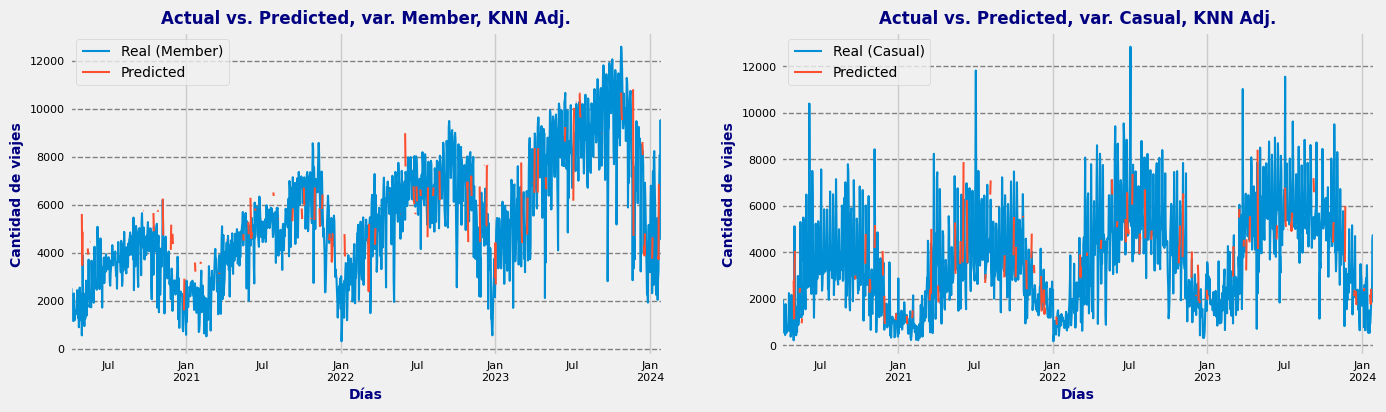

In [248]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['Member'].plot(ax=axes[0], label='Real (Member)')
data_knn_aj['Predicted'].plot(ax=axes[0], label='Predicted')

data['Casual'].plot(ax=axes[1], label='Real (Casual)')
data_knn_aj_c['Predicted'].plot(ax=axes[1], label='Predicted')

axes[0].set_title('Actual vs. Predicted, var. Member, KNN Adj.', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})
axes[1].set_title('Actual vs. Predicted, var. Casual, KNN Adj.', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'navy'})

axes[0].set_xlabel("Días", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[1].set_xlabel("Días", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})

axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

# Prediccion de los datos futuros, periodo desde el 01-02-2024 hasta el 02-04-2024.

Se generó el dataset con la informacion climatica y de calendario desde el 01-02-2024 hasta el 02-04-2024. Se procede con la lectura del archvio, se asinga la variable "Data_started" como index del dataset y se procede con la visualizacion del dataset.

In [129]:
data_2024=pd.read_csv('/content/drive/MyDrive/Data_CBS/final/data_2024.csv')

In [130]:
data_2024['Date_started'] = pd.to_datetime(data_2024['Date_started'], format='%Y-%m-%d')
data_2024 = data_2024.set_index('Date_started')
data_2024 = data_2024.asfreq('D')
data_2024 = data_2024.sort_index()
print(data_2024.shape)

(62, 13)


In [131]:
data_2024.head()

Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  \
Date_started                                                                 
2024-02-01            1           4            1            0  2024      2   
2024-02-02            1           5            1            0  2024      2   
2024-02-03            1           6            0            0  2024      2   
2024-02-04            1           7            0            0  2024      2   
2024-02-05            1           1            1            0  2024      2   

              Day  Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                              
2024-02-01      1                        0.0                        9.0   
2024-02-02      2                        8.0                        9.0   
2024-02-03      3                        2.0                       11.0   
2024-02-04      4                        0.0                       11.0   
2024-02-05      5                        1.0                       11.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2024-02-01                                     16.0   
2024-02-02                                     13.0   
2024-02-03                                     29.0   
2024-02-04                                     15.0   
2024-02-05                                     16.0   

              Precipitaciones totales diarias      Presión  Descripción  
Date_started                                                             
2024-02-01                                0.0  1018.799988          0.0  
2024-02-02                                0.0  1012.200012          0.0  
2024-02-03                                0.0  1018.000000          0.0  
2024-02-04                                0.0  1017.000000          0.0  
2024-02-05                                0.0  1013.400024          0.0

Se aplicará los modelos de Random Forest con los hiperparametros ajustados para la prediccion de los datos, para ambas variables objetivo.

In [133]:
modelo_rf_best = RandomForestRegressor(
            n_estimators = 800,
            min_samples_split = 2,
            min_samples_leaf = 2,
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            bootstrap = True,
            n_jobs       = -1,
            random_state = 90
         )


modelo_rf_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_leaf=2, n_estimators=800,
                      n_jobs=-1, random_state=90)

In [134]:
modelo_rf_c_best = RandomForestRegressor(
            n_estimators = 900,
            min_samples_split = 2,
            min_samples_leaf = 1,
            max_depth    = 80,
            max_features = 'sqrt',
            oob_score    = False,
            bootstrap = True,
            n_jobs       = -1,
            random_state = 70
         )


modelo_rf_c_best.fit(X_train_c, y_train_c)

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=900,
                      n_jobs=-1, random_state=70)

Se generan las predicciones sobre el conjunto de datos data_2024.

In [135]:
# Para cada conjunto de datos se eligen las variables, con las que se entrenó cada modelo.
data_2024m=data_2024[selected_features]
data_2024c=data_2024[selected_features_5]

In [136]:
#Se realiza la prediccion sobre el conjunto de datos generado.
pred_rf_best = modelo_rf_best.predict(X=data_2024m)
pred_rf_c_best = modelo_rf_c_best.predict(X=data_2024c)

In [137]:
pred_rf_best

array([5818.40833978, 6424.05702728, 4219.50502877, 4218.17504861,
       5806.48837302, 5786.51792361, 5818.28317262, 6362.90317014,
       6593.5306627 , 5723.3213879 , 5356.68864583, 6557.25380357,
       6113.67139931, 6176.21612599, 5929.88431994, 6414.83562883,
       3835.70012202, 3949.76709821, 4803.73783433, 5845.87813393,
       6514.28371478, 6207.50790972, 5702.85977579, 5108.76319097,
       3764.29684821, 6703.79816865, 6099.77816815, 6596.10038127,
       5904.20554812, 6009.4570119 , 5473.49077679, 6048.49540873,
       7362.44350496, 6980.43414038, 7147.82003472, 6772.20409722,
       7170.95948661, 6122.91676488, 6197.19768254, 5597.18986806,
       6946.12293254, 7800.11662879, 7785.1830028 , 7220.36582639,
       5890.18787401, 6881.50384226, 6465.70941964, 5626.15956796,
       7501.60000744, 6144.49871081, 6418.0541131 , 5781.38514335,
       4427.42233829, 6464.50881796, 6848.93171776, 7419.77610714,
       7088.56008532, 6246.4796622 , 6107.42450149, 5531.97604

In [138]:
pred_rf_c_best

array([1738.6       , 2369.49222222, 2177.10111111, 1982.79      ,
       1745.63555556, 1875.26      , 1898.95      , 2061.46222222,
       2406.58444444, 2858.01      , 3250.19111111, 2112.88111111,
       1664.71333333, 1796.89666667, 1796.28444444, 2109.39555556,
       1646.69333333, 1832.96222222, 2059.10555556, 1867.92777778,
       2051.79111111, 1791.19222222, 1816.41666667, 2502.22666667,
       1733.52555556, 2194.02555556, 2123.56555556, 2018.11444444,
       1885.80333333, 2986.04333333, 3787.61      , 5130.85222222,
       3521.60555556, 3003.94888889, 2914.25888889, 2995.56444444,
       4645.07666667, 5826.44555556, 4893.2       , 2036.09444444,
       3738.36777778, 4157.55666667, 4377.92333333, 4612.07777778,
       4667.00888889, 7044.61444444, 3218.77444444, 1978.16444444,
       3516.03777778, 2583.16666667, 3525.41      , 4710.82333333,
       2196.56666667, 3052.79666667, 3427.28222222, 3497.19111111,
       3198.95333333, 3838.28222222, 5654.84555556, 4886.00666

In [157]:
#Se agregar los valores predichos al conjunto de datos generado.
member_casual= pd.DataFrame(data_2024)
member_casual = member_casual.assign(Predicted_member = pred_rf_best.flatten().tolist())
member_casual = member_casual.assign(Predicted_casual = pred_rf_c_best.flatten().tolist())
member_casual.head(10)

Temporada  Dia_semana  Dia_laboral  Feriado_WDC  Year  Month  \
Date_started                                                                 
2024-02-01            1           4            1            0  2024      2   
2024-02-02            1           5            1            0  2024      2   
2024-02-03            1           6            0            0  2024      2   
2024-02-04            1           7            0            0  2024      2   
2024-02-05            1           1            1            0  2024      2   
2024-02-06            1           2            1            0  2024      2   
2024-02-07            1           3            1            0  2024      2   
2024-02-08            1           4            1            0  2024      2   
2024-02-09            1           5            1            0  2024      2   
2024-02-10            1           6            0            0  2024      2   

              Day  Temperatura mínima diaria  Temperatura máxima diaria  \
Date_started                                                              
2024-02-01      1                        0.0                        9.0   
2024-02-02      2                        8.0                        9.0   
2024-02-03      3                        2.0                       11.0   
2024-02-04      4                        0.0                       11.0   
2024-02-05      5                        1.0                       11.0   
2024-02-06      6                        0.0                       12.0   
2024-02-07      7                       -1.0                       11.0   
2024-02-08      8                        2.0                       13.0   
2024-02-09      9                        7.0                        9.0   
2024-02-10     10                        9.0                       11.0   

              Velocidad del viento máxima constante  \
Date_started                                          
2024-02-01                                     16.0   
2024-02-02                                     13.0   
2024-02-03                                     29.0   
2024-02-04                                     15.0   
2024-02-05                                     16.0   
2024-02-06                                     22.0   
2024-02-07                                     11.0   
2024-02-08                                     15.0   
2024-02-09                                     16.0   
2024-02-10                                     13.0   

              Precipitaciones totales diarias      Presión  Descripción  \
Date_started                                                              
2024-02-01                                0.0  1018.799988          0.0   
2024-02-02                                0.0  1012.200012          0.0   
2024-02-03                                0.0  1018.000000          0.0   
2024-02-04                                0.0  1017.000000          0.0   
2024-02-05                                0.0  1013.400024          0.0   
2024-02-06                                0.0  1019.099976          0.0   
2024-02-07                                0.0  1025.199951          0.0   
2024-02-08                                0.0  1025.900024          0.0   
2024-02-09                                0.0  1022.599976          0.0   
2024-02-10                                0.0  1014.200012          0.0   

              Predicted_member  Predicted_casual  
Date_started                                      
2024-02-01         5818.408340       1738.600000  
2024-02-02         6424.057027       2369.492222  
2024-02-03         4219.505029       2177.101111  
2024-02-04         4218.175049       1982.790000  
2024-02-05         5806.488373       1745.635556  
2024-02-06         5786.517924       1875.260000  
2024-02-07         5818.283173       1898.950000  
2024-02-08         6362.903170       2061.462222  
2024-02-09         6593.530663       2406.584444  
2024-02-10         5723.321388       2858.010000

In [159]:
#Se guardan los datos pronosticados en el archivo prediccion_2024.csv
member_casual.to_csv('prediccion_2024.csv')

Se procede con la visualizacion de los datos originales desde el 01042020 - 31012024 y valores predichos desde el 01022024 - 02042024.

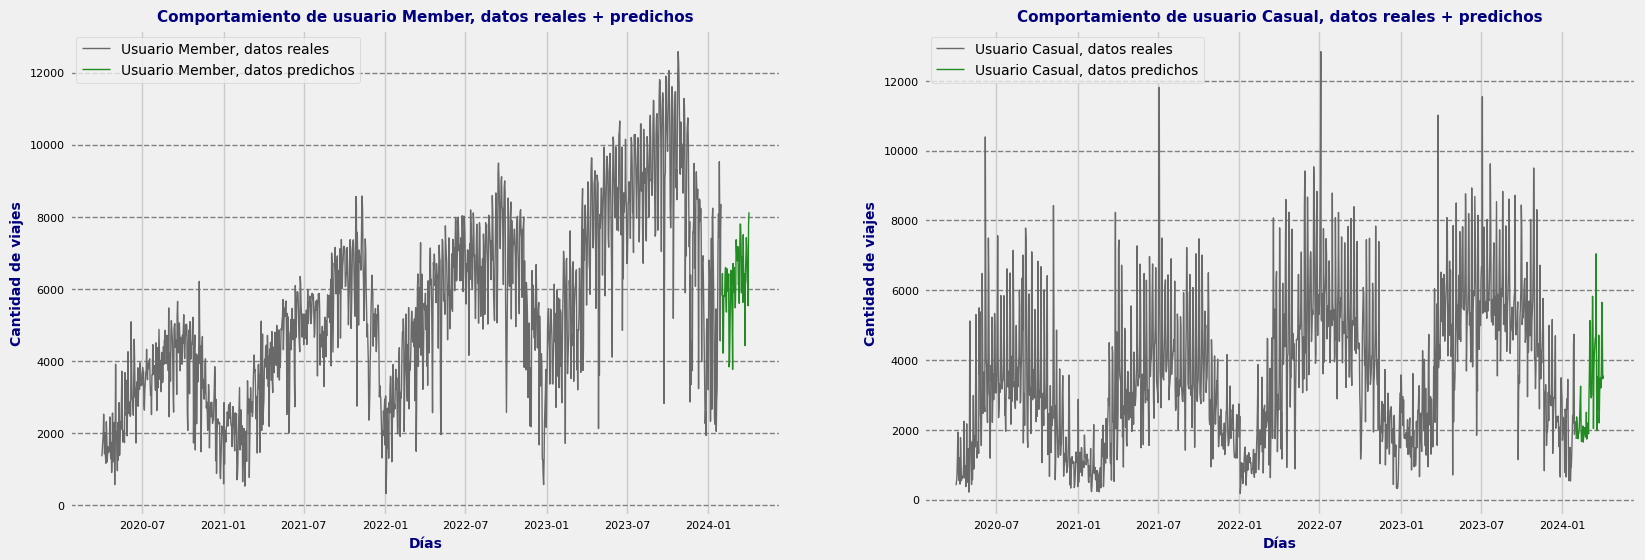

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].plot(data.index, data['Member'], color = "dimgray", linewidth = 1, label='Usuario Member, datos reales')
axes[0].plot(member_casual.index, member_casual['Predicted_member'], color = "forestgreen", linewidth = 1, label='Usuario Member, datos predichos')

axes[1].plot(data.index, data['Casual'], color = "dimgray", linewidth = 1, label='Usuario Casual, datos reales')
axes[1].plot(member_casual.index, member_casual['Predicted_casual'], color = "forestgreen", linewidth = 1, label='Usuario Casual, datos predichos')

axes[0].set_title('Comportamiento de usuario Member, datos reales + predichos', loc = "Center", fontdict = {'fontsize':11, 'fontweight':'bold', 'color':'navy'})
axes[0].set_xlabel("Días", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[0].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[0].legend(prop={'size': 10}, loc = 'upper left')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1].set_title('Comportamiento de usuario Casual, datos reales + predichos', loc = "Center", fontdict = {'fontsize':11, 'fontweight':'bold', 'color':'navy'})
axes[1].set_xlabel("Días", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[1].set_ylabel("Cantidad de viajes", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'navy'})
axes[1].legend(prop={'size': 10}, loc = 'upper left')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.show()
